In [1]:
import numpy as np 
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import os
import string

In [2]:
fig_sav = "../../../Manuscript/Graph-Seismic_Velocity_exact_Scientific_Reports/Revision/Scientific_Reports_Revision"

In [3]:
path = "../" # Specify the path to your 

In [4]:
#np.loadtxt(path + "Third_Examples_Weighted/Data/Model1.csv", delimiter = ",")

#### Data Loading Adjacency matrix Data files

Some notes, 

In the $v_1 = 500$ model, we have $v_2$ ranging from 300 to 2000. We will only experiment with the cases $v_2 \ge v_1 - 30\% v_1$. 

The following cases are to be examined: 
1. $v_2 \ge v_1 - 30\% v_1$, so $v_2 \ge 350$ So the first index is at 10
2. $v_2 \ge v_1 - 20\% v_1$, so $v_2 \ge 400$ So the first index is at 20 
3. $v_2 \ge v_1 - 10\% v_1$, so $v_2 \ge 450$ So the first index is at 30
3. $v_2 \ge v_1$, so $v_2 \ge 500$ So the first index is at 40 or 45 or 50

## Loading the weighted graph data for  𝑣1=500  model

### Code below computes all eigenvalues of normalized

In [5]:
model_norm_LE = {} 
model_norm_LE_all = {}


folder = path + "Third_Examples_Weighted/Data" 
#os.listdir(folder)

for file in os.listdir(folder):
    fName = os.path.join(folder, file)
    model = np.loadtxt(fName, delimiter = ",")/1000 
    new_mat = []
    col_sum = np.sum(model, axis = 1)
    for i in range(model.shape[0]): 
        row =[]
        for j in range(model.shape[1]):
            if i == j: 
                row.append(1)
            else: 
                row.append(-model[i,j]/np.sqrt(col_sum[i]*col_sum[j]))
        new_mat.append(row)
    model_norm = np.array(new_mat)
    #LWG = np.diag(model.sum(0)) - model
    LE = np.max(np.linalg.eigvals(model))
    E_norm = np.linalg.eigvals(model_norm)
    model_norm_LE_all[int(file.replace(".csv","").replace("Model",""))] = list(E_norm[np.argsort(E_norm)])
    #model_LE[int(file.replace(".csv","").replace("Model",""))] = [LE]

In [6]:
model

array([[  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  23.585,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         21.9  ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  12.352,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,  12.352,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,  21.9  ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,  23.585,   0.   ],
       [ 23.585,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   , 226.42 ],
       [  0.   ,  21.9  ,   0.   ,   0.   ,   0.   ,   0.   , 

In [7]:
### Code below tests only the first and second largest eigenvalues of normalized

***Code below computes only the first and second largest eigenvalues of normalized Laplacian***

In [8]:
model_LE = {}
model_norm_LE = {} 


folder = path + "Third_Examples_Weighted/Data" 
#os.listdir(folder)

for file in os.listdir(folder):
    fName = os.path.join(folder, file)
    model = np.loadtxt(fName, delimiter = ",")/1000 
    new_mat = []
    col_sum = np.sum(model, axis = 1)
    for i in range(model.shape[0]): 
        row =[]
        for j in range(model.shape[1]):
            if i == j: 
                row.append(1)
            else: 
                row.append(-model[i,j]/np.sqrt(col_sum[i]*col_sum[j]))
        new_mat.append(row)
    model_norm = np.array(new_mat)
    #LWG = np.diag(model.sum(0)) - model
    LE = np.max(np.linalg.eigvals(model))
    E_norm = np.linalg.eigvals(model_norm)
    model_norm_LE[int(file.replace(".csv","").replace("Model",""))] = list(E_norm[np.argsort(E_norm)[len(E_norm)-2:]])
    model_LE[int(file.replace(".csv","").replace("Model",""))] = [LE]

In [9]:
np.linalg.eigvals(model_norm)

array([0.        , 2.        , 0.51551749, 0.64393507, 0.6928549 ,
       1.        , 1.48448251, 1.3071451 , 1.35606493, 0.50296881,
       0.61790054, 1.38209946, 1.49703119])

In [10]:
np.linalg.eigvals(model)

array([-3.72445693e+02,  3.72445693e+02, -2.35850000e+01, -2.23215434e+01,
        1.13276941e-15, -1.26643236e+01,  2.35850000e+01,  2.23215434e+01,
        1.26643236e+01, -2.19000000e+01, -1.23520000e+01,  1.23520000e+01,
        2.19000000e+01])

In [11]:
#model_norm

### Sorting the weighted graph data for $v_1 = 500$ model

In [12]:
L = list(model_LE.keys())
L.sort()

sort_eig = []
sort_eig_2 = []

for ky in L: 
    sort_eig.append(model_LE.get(ky))
    sort_eig_2.append(model_LE[ky])

sorted_model_LE = np.array(sort_eig)
#plt.plot(sorted_model_LE)
#plt.plot(sort_eig_2,sort_eig)

### Sorting the weighted normalized laplacian data for $v_1 = 500$ model

In [13]:
norm_wg_L = list(model_norm_LE.keys())
norm_wg_L.sort()

sort_eig_norm_wg = []

for ky in norm_wg_L: 
    sort_eig_norm_wg.append(model_norm_LE.get(ky))
    
sorted_norm_wg_LE = np.array(sort_eig_norm_wg)
sorted_norm_wg_LE = sorted_norm_wg_LE[:,[1,0]]

In [14]:
#sorted_norm_wg_LE

In [15]:
norm_wg_L_all = list(model_norm_LE_all.keys())
norm_wg_L_all.sort()

sort_eig_norm_wg_all = []

for ky in norm_wg_L_all: 
    sort_eig_norm_wg_all.append(model_norm_LE_all.get(ky))
    
sorted_norm_wg_LE_all = np.array(sort_eig_norm_wg_all)

In [16]:
model.shape
model.shape[0]

13

In [21]:
row_sum = np.sum(model, axis = 0)
row_sum

array([ 23.585,  21.9  ,  12.352,  12.352,  21.9  ,  23.585, 250.005,
       150.   ,  50.   ,  50.   , 150.   , 250.005, 784.336])

In [18]:
np.sum(np.array([[2,5], [4,1], [6,8]]), axis = 1)

array([ 7,  5, 14])

In [19]:
col_sum = np.sum(model, axis = 1)

In [20]:
col_sum

array([ 23.585,  21.9  ,  12.352,  12.352,  21.9  ,  23.585, 250.005,
       150.   ,  50.   ,  50.   , 150.   , 250.005, 784.336])

In [23]:
new_mat = []
for i in range(model.shape[0]): 
    row =[]
    for j in range(model.shape[1]):
        if i == j: 
            row.append(1)
        else: 
            row.append(-model[i,j]/np.sqrt(col_sum[i]*col_sum[j]))
    new_mat.append(row)

In [24]:
np.array(new_mat)

array([[ 1.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.3071451 , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        ,  1.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.38209946, -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        ,  1.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.49703119, -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ,  1.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.49703119,
        -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.38209946, -0.        , -0.        ],
       [-0.        , -0.      

In [25]:
model

array([[  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  23.585,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         21.9  ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  12.352,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,  12.352,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,  21.9  ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,  23.585,   0.   ],
       [ 23.585,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   , 226.42 ],
       [  0.   ,  21.9  ,   0.   ,   0.   ,   0.   ,   0.   , 

In [26]:
col_sum

array([ 23.585,  21.9  ,  12.352,  12.352,  21.9  ,  23.585, 250.005,
       150.   ,  50.   ,  50.   , 150.   , 250.005, 784.336])

In [27]:
#226.42/np.sqrt(250.005*784.336)

### Loading v2 for $v_1 = 500$ model

In [29]:
v2 = np.loadtxt(path + "Third_Examples_Weighted/v_2.csv",delimiter=",")
v2 = v2.reshape(len(v2),-1)

In [30]:
out_arr_norm_wg = np.concatenate((v2,sorted_norm_wg_LE),axis = 1) 
np.savetxt(path + "now.csv",out_arr_norm_wg, delimiter=",")

In [31]:
out_arr_LE = np.concatenate((v2,sorted_model_LE),axis = 1)

In [32]:
v2[50]

array([550.])

In [33]:
v2_test = np.loadtxt(path + "Fourth_Examples_Weighted/v2.csv",delimiter=",")
v2_test = v2_test.reshape(len(v2_test),-1) 


## Data Exploration 

***Investigating the largest eigenvalue of the weighted adjacency matrix and the eigenvalues of the normalized laplacian***

Text(0, 0.5, '$v_2$')

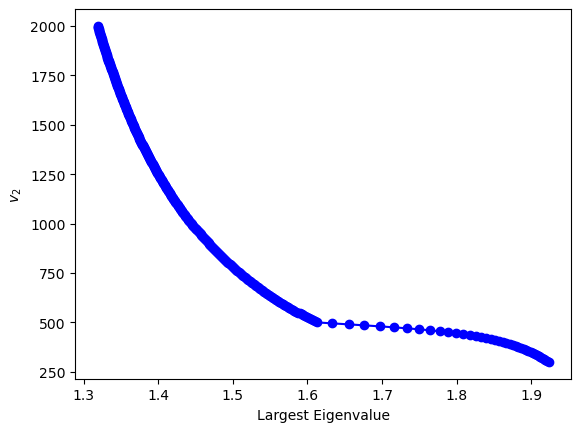

In [35]:
#Plot of second largest eigenvalue of the normalized laplacian, vs the velocity v_2 
plt.plot(sorted_norm_wg_LE[:,1][:],v2[:], "b-o")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

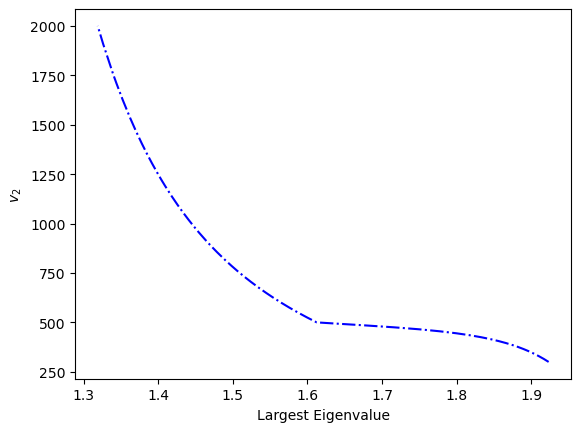

In [36]:
#Plot of second largest eigenvalue of the normalized laplacian, vs the velocity v_2 
plt.plot(sorted_norm_wg_LE[:,1][:],v2[:], "b-.")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

Text(0, 0.5, '$v_2$')

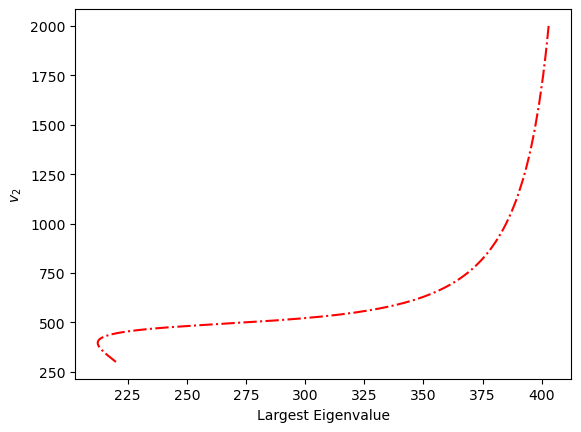

In [37]:
#Plot of largest eigenvalue of the normalized laplacian, vs the velocity v_2 
plt.plot(sorted_model_LE[:],v2[:], "r-.")
plt.xlabel("Largest Eigenvalue")
plt.ylabel(r"$v_2$")

***In our study, we consider the models with $v_2 \ge 550$, for $v_1 = 500$. For this purpose, we filter the data accordingly.*** 

Plot of second largest eigenvalue of the normalized laplacian, vs the velocity $v_2$.  

Text(0, 0.5, '$V_2$')

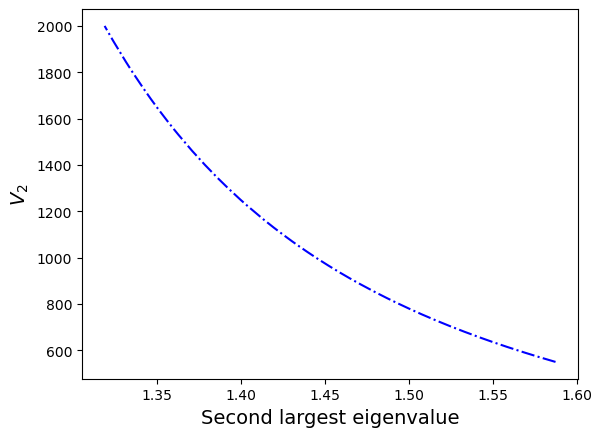

In [38]:
# Second Largest eigencvalues of the normalized Lapalcian for models v_1 >= 550
plt.plot(sorted_norm_wg_LE[:,1][50:],v2[50:], "b-.")
plt.xlabel("Second largest eigenvalue", fontsize=14)
plt.ylabel(r"$V_2$", fontsize=14)
#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/norm_v1_500_relation.eps")

Text(0, 0.5, '$V_2$')

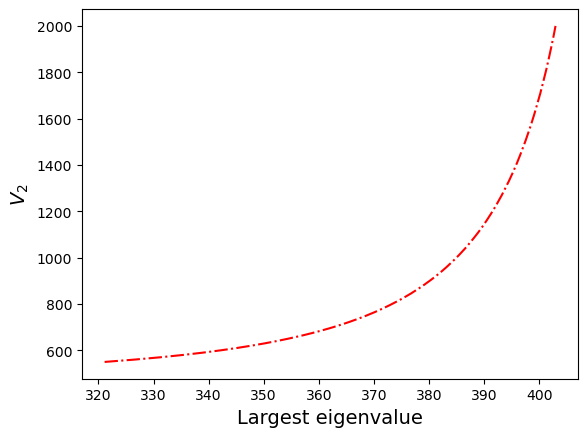

In [39]:
# Largest eigencvalues of the adjacency matrices for models v_1 >= 550
plt.plot(sorted_model_LE[50:],v2[50:], "r-.")
plt.xlabel("Largest eigenvalue", fontsize=14)
plt.ylabel(r"$V_2$", fontsize=14)
#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weighted_v1_500_relation.eps")

### Exploring other eigenvalues of normalized laplacian

Text(0, 0.5, '$V_2$')

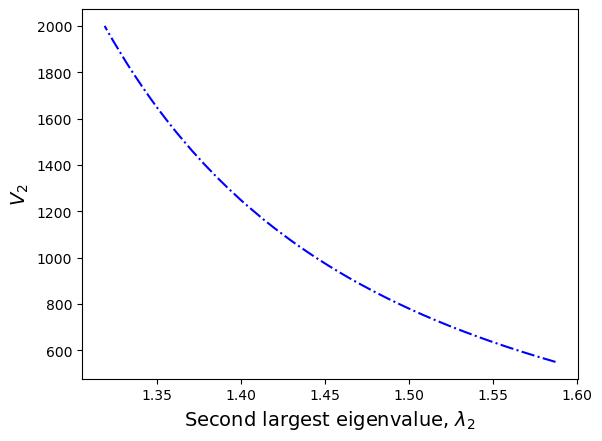

In [40]:
# Second Largest eigencvalues of the adjacency for models v_1 >= 550
plt.plot(sorted_norm_wg_LE_all[:,-2][50:],v2[:][50:], "b-.")
plt.xlabel(r"Second largest eigenvalue, $\lambda_{2}$", fontsize = 14)
plt.ylabel(r"$V_2$", fontsize = 14) 
plt.savefig(fig_sav+"/SecondLargest_V2_Relation_for_V1_500.eps")

Text(0, 0.5, '$V_2$')

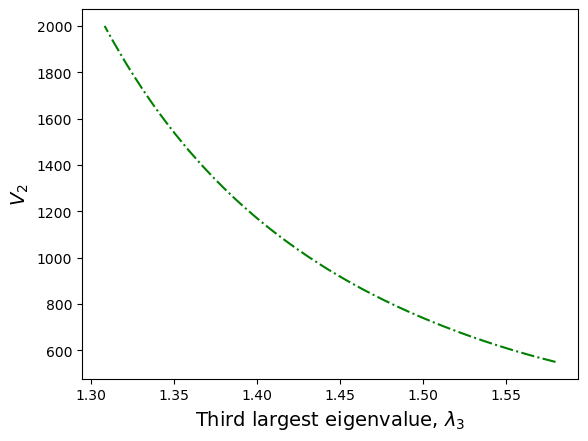

In [41]:
plt.plot(sorted_norm_wg_LE_all[:,-3][50:],v2[:][50:], "g-.")
plt.xlabel(r"Third largest eigenvalue, $\lambda_{3}$", fontsize = 14)
plt.ylabel(r"$V_2$", fontsize = 14) 
plt.savefig(fig_sav+"/ThirdLargest_V2_Relation_for_V1_500.eps")

Text(0, 0.5, '$V_2$')

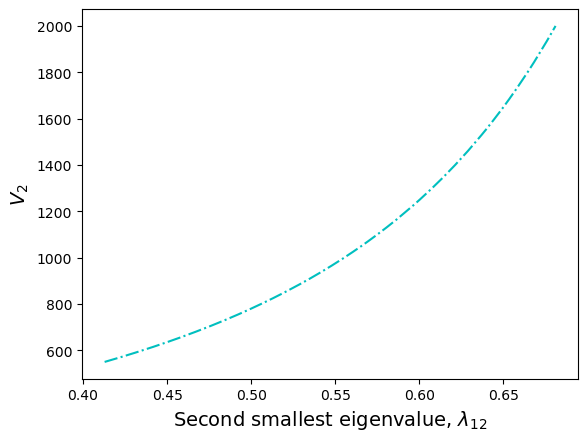

In [42]:
plt.plot(sorted_norm_wg_LE_all[:,1][50:],v2[:][50:], "c-.")
plt.xlabel(r"Second smallest eigenvalue, $\lambda_{12}$", fontsize = 14)
plt.ylabel(r"$V_2$", fontsize = 14) 
plt.savefig(fig_sav+"/SecondSmallest_V2_Relation_for_V1_500.eps")

Text(0, 0.5, '$V_2$')

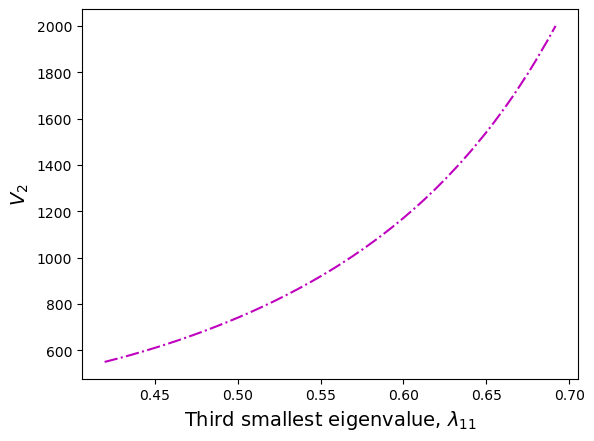

In [43]:
plt.plot(sorted_norm_wg_LE_all[:,2][50:],v2[:][50:], "m-.")
plt.xlabel(r"Third smallest eigenvalue, $\lambda_{11}$", fontsize = 14)
plt.ylabel(r"$V_2$", fontsize = 14) 
plt.savefig(fig_sav+"/ThirdSmallest_V2_Relation_for_V1_500.eps")

In [44]:
#v2[:][50]

In [45]:
### Just a test Laplacian that I created
#np.linalg.eig(np.array([[1, 2/np.sqrt(12), 4/np.sqrt(12)], [2/np.sqrt(12), 1, 0], [4/np.sqrt(24), 0, 1]]))

To identify the appropriate regression model for estimating the seismic vleocity $v_2$ from the eigenvalues, we explore different regression models and their accuracies. 

## Linear Regression Models for the Normalized Laplacian 


### Degree 1  regression

In [46]:
lin_re = LinearRegression()

In [47]:
lin_re.fit(sorted_norm_wg_LE[:,1:][50:],v2[50:]) #[50:]

LinearRegression()

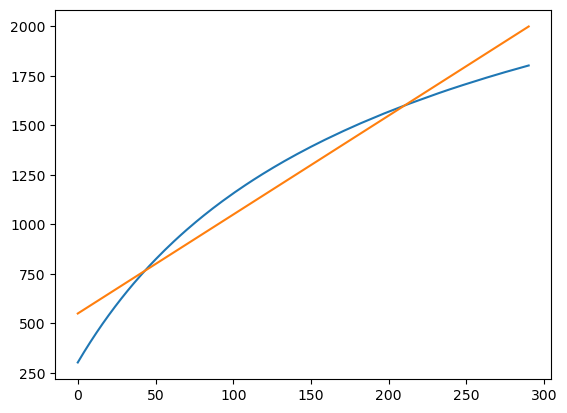

In [48]:
plt.plot(lin_re.predict(sorted_norm_wg_LE[:,1:][50:]))
plt.plot(v2[50:])

Text(0, 0.5, 'percentage error')

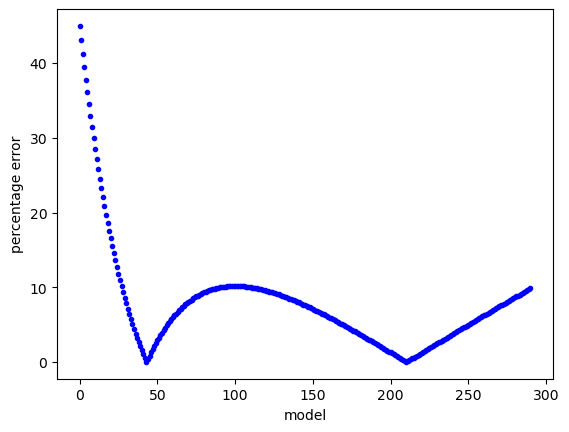

In [50]:
plt.plot(np.linspace(0,290,291),np.abs(lin_re.predict(sorted_norm_wg_LE[:,1:][50:])-v2[50:])*100/v2[50:], 'b.')
plt.xlabel("model")
plt.ylabel("percentage error")

### Higher Polynomial Regression for the Normalized Laplacian

#### Quartic Polynomial Regression

In [51]:
poly_norm_model = PolynomialFeatures(degree=4,include_bias=False)
poly_norm_model_features = poly_norm_model.fit_transform(sorted_norm_wg_LE[:,1:][50:])

In [52]:
lr_norm_poly = LinearRegression()
lr_norm_poly.fit(poly_norm_model_features, v2[50:])

LinearRegression()

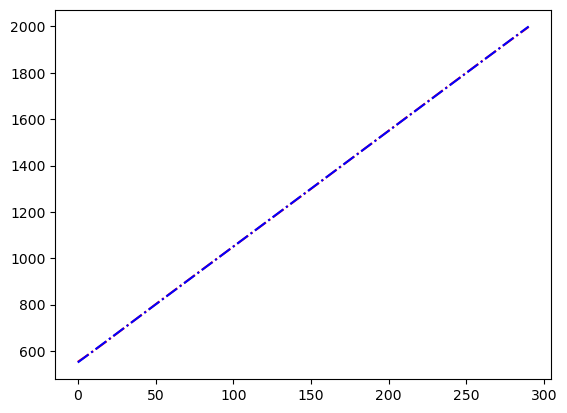

In [53]:
plt.plot(lr_norm_poly.predict(poly_norm_model_features), 'r-.')
plt.plot(v2[50:], 'b-.')

***Plots of Error*** 

1. Percentage Error
2. Absolute Error

Text(0, 0.5, 'percentage error')

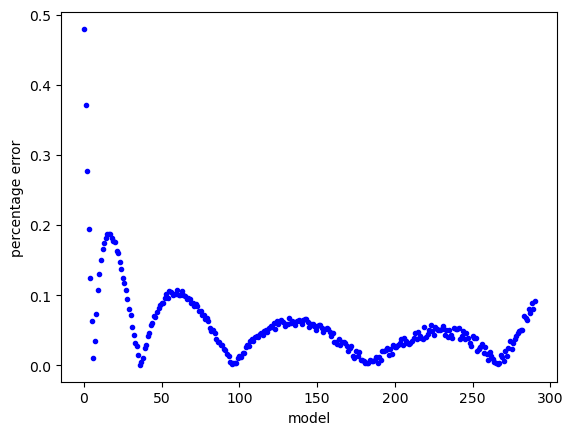

In [54]:
plt.plot(np.linspace(0,290,291),abs((lr_norm_poly.predict(poly_norm_model_features)-v2[50:])/v2[50:])*100, 'b.')
plt.xlabel("model")
plt.ylabel("percentage error")

In [55]:
#np.linspace(start = 0,stop = 290,num=291)

Text(0, 0.5, 'absolute error')

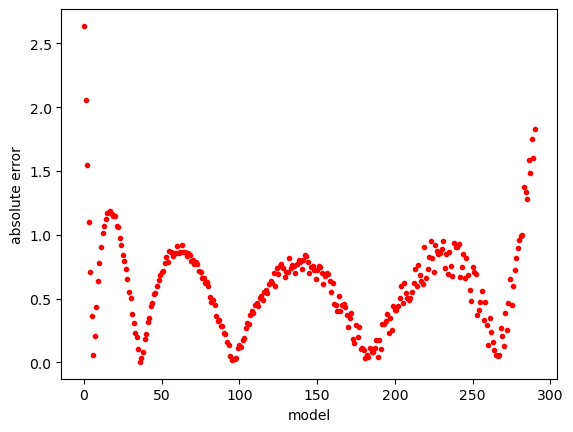

In [56]:
plt.plot(np.linspace(0,290,291), abs(lr_norm_poly.predict(poly_norm_model_features)-v2[50:]).flatten(), 'r.')
plt.xlabel("model")
plt.ylabel("absolute error")

In [57]:
abs(lr_norm_poly.predict(poly_norm_model_features)-v2[50:]).shape

(291, 1)

***The regression parameters, from scikit learn***

In [58]:
lr_norm_poly.coef_

array([[-2313161.30496803,  2239771.14791595,  -968451.33197468,
          157595.56722496]])

In [60]:
lr_norm_poly.intercept_

array([901733.1697351])

In [61]:
#lr_norm_poly.predict(np.array([[0,0,0,0]]))

## Split normalized graph data with $v_2 = 500$, into train and test set 

- 70% for training 

- 30% for testing

In [62]:
s_ind = 50 # This is the index for filtering the data. The value 50 ensures we consider models with v_2 >= 550 only 

In [63]:
# Create a 2D array with second largest eigenvalues of normalized Laplacian on the first column and corresponding v_2 values on the second
Data_norm = np.concatenate(((sorted_norm_wg_LE[s_ind:,1:]).reshape(-1, 1),v2[s_ind:]), axis = 1) 

Text(0, 0.5, '$v_2$')

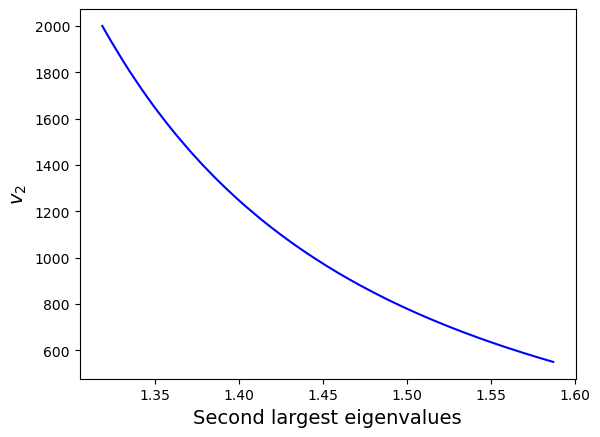

In [64]:
# Visualize the data 
plt.plot(Data_norm[:,0], Data_norm[:,1], "b-") 
plt.xlabel("Second largest eigenvalues", fontsize = 14)
plt.ylabel(r"$v_2$", fontsize = 14)
# plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity/Figures/v1_500_relation.png")

In [66]:
# Spliting the dataset (Normalized Laplacian)
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(Data_norm[:,0], Data_norm[:,1], train_size=0.7, test_size=0.3,random_state=0)

## train_test_split regression for normalized

In [67]:
poly_norm_train = PolynomialFeatures(degree=4, include_bias=False)
poly_norm_features_train = poly_norm_train.fit_transform(X_norm_train.reshape(-1, 1)) 

lr_norm_poly_train = LinearRegression()
lr_norm_poly_train.fit(poly_norm_features_train, Y_norm_train.reshape(-1,1))

LinearRegression()

In [68]:
poly_norm_features_test = poly_norm_train.fit_transform(X_norm_test.reshape(-1, 1))

In [69]:
lr_norm_poly_pred_test = lr_norm_poly_train.predict(poly_norm_features_test)
lr_norm_poly_pred_train = lr_norm_poly_train.predict(poly_norm_features_train)

In [72]:
lr_norm_poly_train.coef_

array([[-2289986.24116217,  2215422.4728801 ,  -957096.60590276,
          155612.47208659]])

In [73]:
lr_norm_poly_train.intercept_

array([893472.36489854])

### Compute Metrices: 
1. Root mean square error
2. Mean absolute percentage error
3. $r2$ score

In [74]:
print("Root mean square error of the test data is: ", root_mean_squared_error(Y_norm_test, lr_norm_poly_pred_test)) 
print("Mean absolute error of the test data is: ", mean_absolute_error(Y_norm_test, lr_norm_poly_pred_test))  
print("Mean absolute percentage error of the test data is: ", mean_absolute_percentage_error(Y_norm_test, lr_norm_poly_pred_test))   
print("Model R2 score for the test data is: ", r2_score(Y_norm_test, lr_norm_poly_pred_test)) 

Root mean square error of the test data is:  0.7033104388807093
Mean absolute error of the test data is:  0.6322584241411691
Mean absolute percentage error of the test data is:  0.0005323974934955303
Model R2 score for the test data is:  0.9999970328429837


In [75]:
print("Root mean square error of the train data is: ", root_mean_squared_error(Y_norm_train, lr_norm_poly_pred_train)) 
print("Mean absolute error of the train data is: ", mean_absolute_error(Y_norm_train, lr_norm_poly_pred_train))  
print("Mean absolute percentage error of the train data is: ", mean_absolute_percentage_error(Y_norm_train, lr_norm_poly_pred_train))   
print("Model R2 score for the train data is: ", r2_score(Y_norm_train, lr_norm_poly_pred_train)) 

Root mean square error of the train data is:  0.7070039100173281
Mean absolute error of the train data is:  0.6098319721457507
Mean absolute percentage error of the train data is:  0.0005753152525931905
Model R2 score for the train data is:  0.9999972019470351


# Parameter identification via least squares 

Form the matrix systems $Ab = V$, where the entries of the unknown vector $b$ are the regression parameters.

In [76]:
col1 = np.ones((X_norm_train.shape[0],1)) 
col2 = X_norm_train.reshape(-1, 1)
col3 = col2**2 
col4 = col2**3 
col5 = col2**4

rhs = Y_norm_train.reshape(-1,1)

Amat = np.column_stack((col1, col2, col3, col4, col5))  
params = sp.linalg.solve(Amat.T@Amat, Amat.T@rhs)

In [78]:
params

array([[  892690.28357077],
       [-2287817.13918481],
       [ 2213169.31659842],
       [ -956057.71277682],
       [  155433.06815032]])

## Check least squares prediction accuracy 

### Use the parameters obtained in the previous cell to predict both the test and train data

In [79]:
col1_test = np.ones(X_norm_test.reshape(-1, 1).shape) 
col2_test = X_norm_test.reshape(-1, 1)
col3_test = col2_test**2 
col4_test = col2_test**3 
col5_test = col2_test**4 

Amat_test = np.column_stack((col1_test, col2_test, col3_test, col4_test, col5_test)) 
rhs_test = Y_norm_test.reshape(-1,1) 

### Train Data accuracy

In [80]:
# This computes the residual from the train data. rhs contains the actual values of the velocities in the train data. While, the matrix vector multiplication compute the predictions from the train data  

res_train = rhs - Amat@params 
abs_res_train = np.abs(res_train)
perc_res_train = abs(res_train)/rhs*100 

Text(0, 0.5, 'Residual')

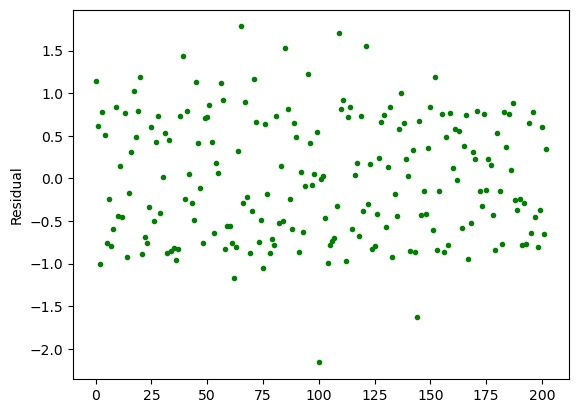

In [81]:
plt.plot(res_train,'g.') 
plt.ylabel("Residual") 
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_train_residual.eps")

Text(0, 0.5, 'Percentage residual')

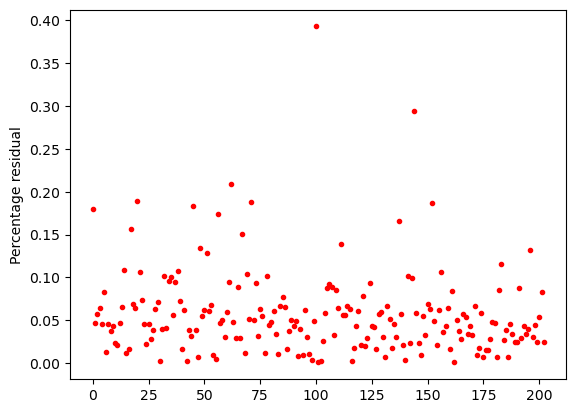

In [82]:
plt.plot(perc_res_train,'r.') 
plt.ylabel("Percentage residual") 
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_train_perc_error_unsorted.eps")

### Test Data accuracy

In [83]:
# This computes the residual from the test data. rhs contains the actual values of the velocities in the test data. While, the matrix vector multiplication compute the predictions from the test data  

res_test = rhs_test - Amat_test@params 
abs_res_test = np.abs(res_test)
perc_res_test = abs(res_test)/rhs_test*100

Text(0, 0.5, 'percentage residual')

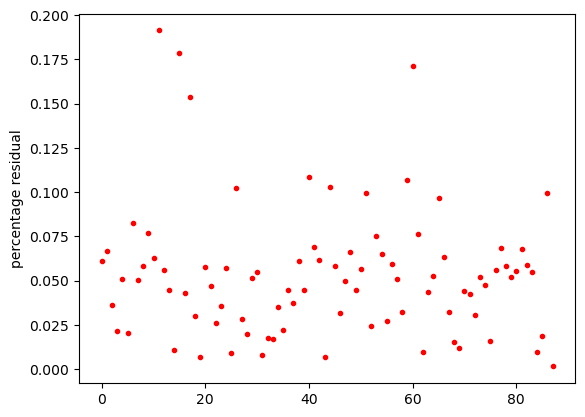

In [84]:
plt.plot(perc_res_test,'r.') 
plt.ylabel("percentage residual")
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_test_perc_error_unsorted.eps")

# Sorted Plots

In [85]:
train_sarg = np.argsort(Y_norm_train) # train_sarg refers to training data sorted arg
test_sarg = np.argsort(Y_norm_test) # test_sarg refers to training data sorted arg
Y_norm_train_sort = Y_norm_train[train_sarg] 
Y_norm_test_sort = Y_norm_test[test_sarg]

res_train_sort = res_train[train_sarg]
res_test_sort = res_test[test_sarg]


abs_res_train_sort = abs_res_train[train_sarg]
abs_res_test_sort = abs_res_test[test_sarg] 



perc_res_train_sort = perc_res_train[train_sarg]
perc_res_test_sort = perc_res_test[test_sarg]


Text(0.5, 0, '$V_2$')

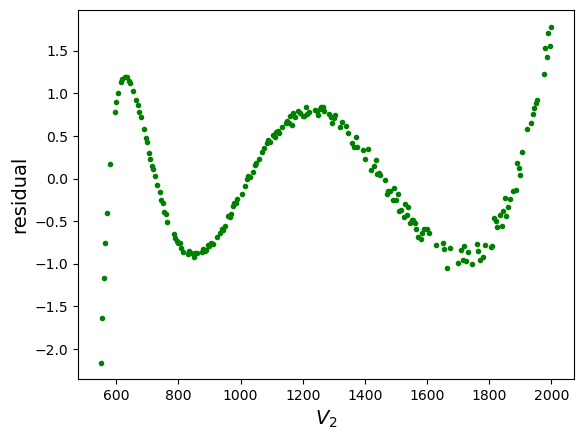

In [86]:
plt.plot(Y_norm_train_sort,res_train_sort,'g.') 
plt.ylabel("residual", fontsize = 14) 
plt.xlabel(r"$V_2$" , fontsize = 14) 
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_train_residual.eps")

Text(0.5, 0, '$V_2$')

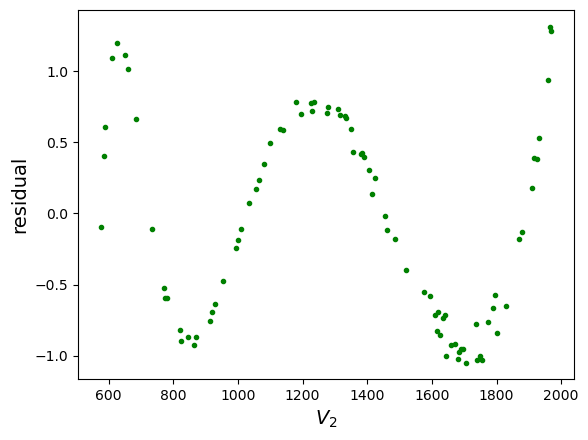

In [87]:
plt.plot(Y_norm_test_sort,res_test_sort,'g.') 
plt.ylabel("residual", fontsize =  14) 
plt.xlabel(r"$V_2$", fontsize =  14) 
#.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_test_residual.eps")

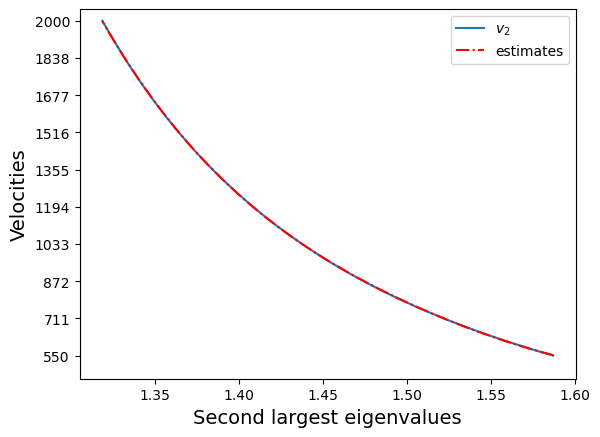

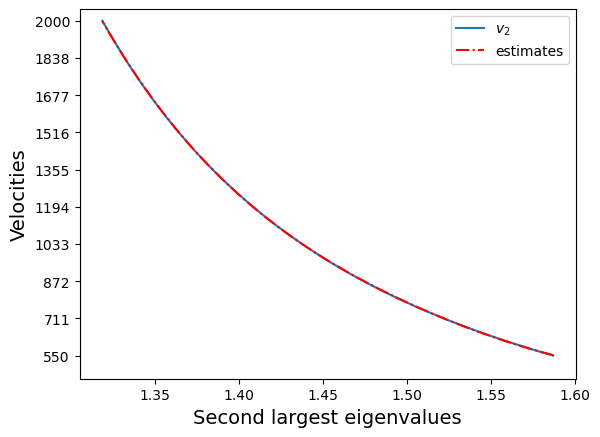

In [93]:
train_sarg = np.argsort(Y_norm_train)
Y_norm_train_sort = Y_norm_train[train_sarg]
#norm_pred_train_sort = lr_norm_poly_pred_train.flatten()[train_sarg] 
norm_pred_train_sort = (Amat@params).flatten()[train_sarg]
norm_eig_train_sort = X_norm_train[train_sarg]


plt.plot(norm_eig_train_sort,Y_norm_train_sort, label = r"$v_2$") 
plt.plot(norm_eig_train_sort,norm_pred_train_sort, "r-.", label = "estimates")

plt.yticks(np.linspace(Y_norm_train_sort.min(), Y_norm_train_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_norm_train_sort[0]-100), np.max(Y_norm_train_sort[-1]+50))
plt.ylabel("Velocities", fontsize = 14)
plt.xlabel("Second largest eigenvalues", fontsize = 14)
plt.legend()
#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/norm_v1_500_train_pred.eps")

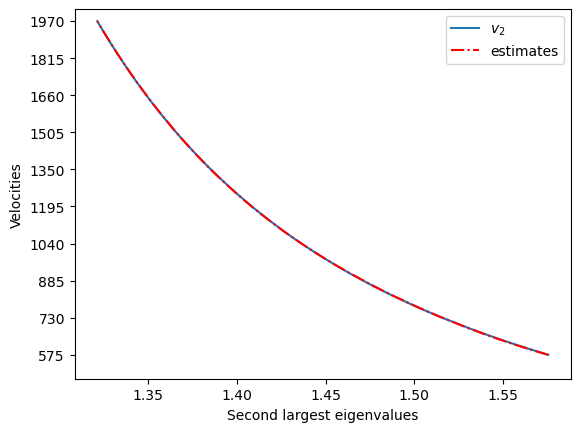

In [97]:
test_sarg = np.argsort(Y_norm_test)
Y_norm_test_sort = Y_norm_test[test_sarg]
#norm_pred_test_sort = lr_norm_poly_pred_test.flatten()[test_sarg] 
norm_pred_test_sort = (Amat_test@params).flatten()[test_sarg]
norm_eig_test_sort = X_norm_test[test_sarg] 


plt.plot(norm_eig_test_sort,Y_norm_test_sort, label = r"$v_2$") 
plt.plot(norm_eig_test_sort,norm_pred_test_sort, "r-.", label = "estimates")

plt.yticks(np.linspace(Y_norm_test_sort.min(), Y_norm_test_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_norm_test_sort[0]-100), np.max(Y_norm_test_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Second largest eigenvalues")
plt.legend()

## Percentage Residuals

Text(0, 0.5, 'Percentage error')

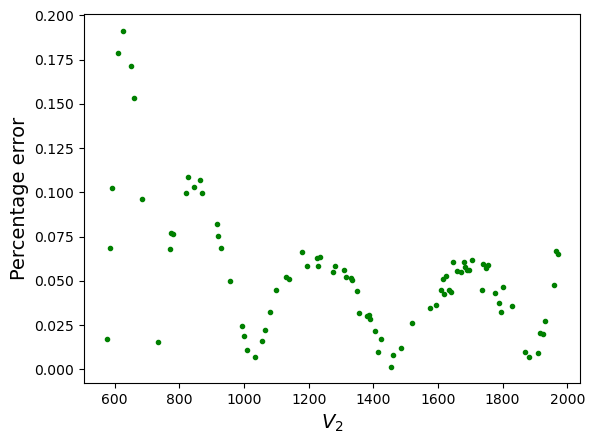

In [99]:
plt.plot(Y_norm_test_sort, np.abs((Y_norm_test_sort - norm_pred_test_sort)/Y_norm_test_sort)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$V_2$", fontsize=14)
plt.ylabel("Percentage error", fontsize=14)

plt.savefig(fig_sav+"/norm_v1_500_test_error.eps")

Text(0, 0.5, 'Percentage error')

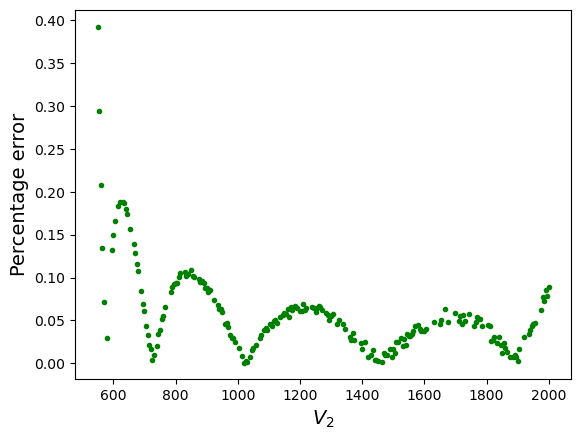

In [102]:
plt.plot(Y_norm_train_sort, np.abs((Y_norm_train_sort - norm_pred_train_sort)/Y_norm_train_sort)*100, "g.") 

plt.xlabel(r"$V_2$", fontsize = 14)
plt.ylabel("Percentage error", fontsize = 14) 
plt.savefig(fig_sav+"/norm_v1_500_train_error.eps") 

## Actual Residuals

In [103]:
#Y_norm_test

In [104]:
#lr_norm_poly_pred_test

Text(0, 0.5, 'residual')

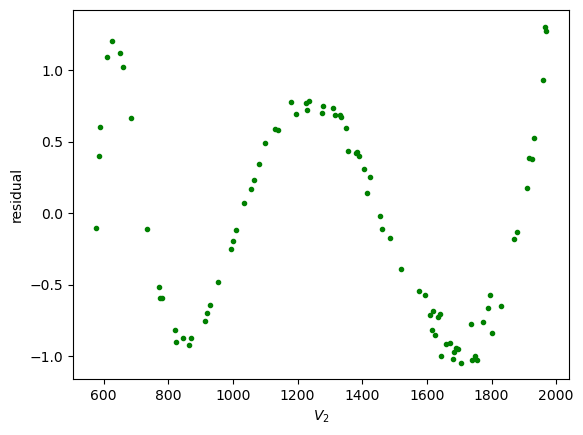

In [106]:
test_sarg = np.argsort(Y_norm_test)
Y_norm_test_sort = Y_norm_test[test_sarg]
norm_pred_test_sort = lr_norm_poly_pred_test.flatten()[test_sarg]
norm_eig_test_sort = X_norm_test[test_sarg] 

plt.plot(Y_norm_test, Y_norm_test - lr_norm_poly_pred_test.flatten(), "g.") 

plt.xlabel(r"$V_2$")
plt.ylabel("residual")

Text(0, 0.5, 'residual')

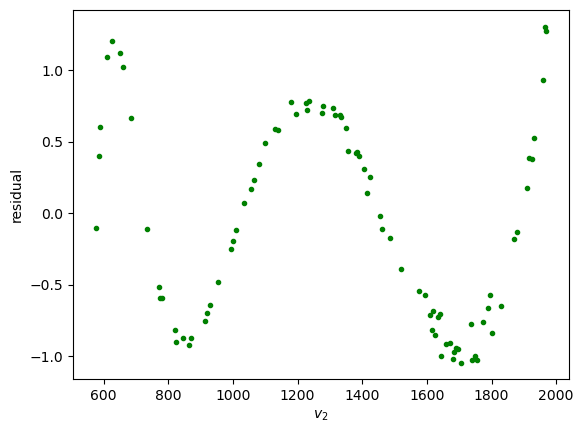

In [107]:
plt.plot(Y_norm_test_sort, Y_norm_test_sort - norm_pred_test_sort, "g.") 
plt.xlabel(r"$v_2$")
plt.ylabel("residual")

Text(0, 0.5, 'percentage residual')

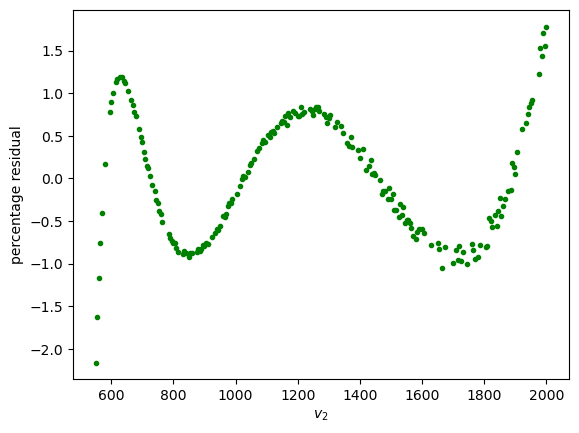

In [108]:
plt.plot(Y_norm_train_sort, Y_norm_train_sort - norm_pred_train_sort, "g.") 

plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual") 

#### Velocity vs Model number plots

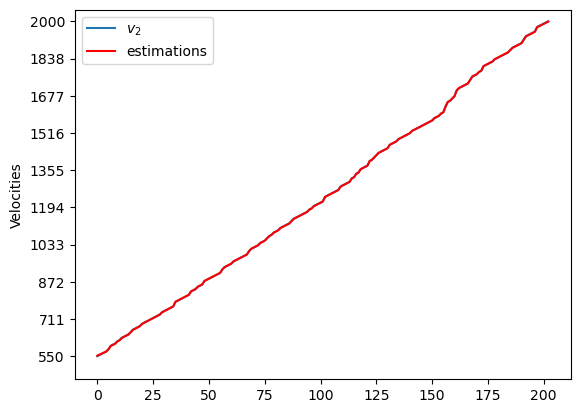

In [109]:
plt.plot(Y_norm_train_sort, label = r"$v_2$") 
plt.plot(norm_pred_train_sort, "r-", label = "estimations")

plt.yticks(np.linspace(Y_norm_train_sort.min(), Y_norm_train_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_norm_train_sort[0]-100), np.max(Y_norm_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.legend()

# Related to noisy data

In [110]:
col1 = np.ones(X_norm_train.reshape(-1, 1).shape) 
col2 = X_norm_train.reshape(-1, 1)
col3 = col2**2 
col4 = col2**3 
col5 = col2**4

In [111]:
Amat = np.column_stack((col1, col2, col3, col4, col5)) 
rhs = Y_norm_train.reshape(-1,1) 
#Y_norm_train = Y_norm_train.reshape(-1,1)
#Y_norm_test = Y_norm_test.reshape(-1,1)

In [112]:
col1_test = np.ones(X_norm_test.reshape(-1, 1).shape) 
col2_test = X_norm_test.reshape(-1, 1)
col3_test = col2_test**2 
col4_test = col2_test**3 
col5_test = col2_test**4 

Amat_test = np.column_stack((col1_test, col2_test, col3_test, col4_test, col5_test)) 
rhs_test = Y_norm_test.reshape(-1,1)

In [115]:
param = sp.linalg.solve(Amat.T@Amat, Amat.T@rhs)

In [116]:
param

array([[  892690.28357077],
       [-2287817.13918481],
       [ 2213169.31659842],
       [ -956057.71277682],
       [  155433.06815032]])

In [117]:
lr_norm_poly_train.coef_, lr_norm_poly_train.intercept_

(array([[-2289986.24116217,  2215422.4728801 ,  -957096.60590276,
           155612.47208659]]),
 array([893472.36489854]))

In [118]:
np.random.seed(0)
noise = 10*np.random.randn(Y_norm_train.shape[0]) 
noise_test = 10*np.random.randn(Y_norm_test.shape[0])

In [119]:
Y_norm_train_noise = Y_norm_train + noise 
Y_norm_test_noise = Y_norm_test + noise_test

In [120]:
param_noise = sp.linalg.solve(Amat.T@Amat, Amat.T@Y_norm_train_noise.reshape(-1,1)) 

In [121]:
param, param_noise

(array([[  892690.28357077],
        [-2287817.13918481],
        [ 2213169.31659842],
        [ -956057.71277682],
        [  155433.06815032]]),
 array([[  940886.76736785],
        [-2425751.62915838],
        [ 2360980.59137456],
        [-1026349.03602287],
        [  167949.21366294]]))

In [122]:
param, param_noise

(array([[  892690.28357077],
        [-2287817.13918481],
        [ 2213169.31659842],
        [ -956057.71277682],
        [  155433.06815032]]),
 array([[  940886.76736785],
        [-2425751.62915838],
        [ 2360980.59137456],
        [-1026349.03602287],
        [  167949.21366294]]))

***Change in data vs change in parameter values***

In [124]:
#np.abs(Y_norm_train_noise - Y_norm_train)/Y_norm_train*100

In [128]:
np.abs(param - param_noise)/param*100

array([[ 5.39901517],
       [-6.02908719],
       [ 6.67871517],
       [-7.35220503],
       [ 8.05243418]])

In [126]:
np.max(np.abs(Y_norm_train_noise - Y_norm_train)/Y_norm_train*100)

4.293954549304405

In [127]:
np.max(np.abs(param - param_noise)/param*100)

8.052434183774393

## Check prediction with the noisy parameter recovered

Text(0.5, 0, '$\\hat{V}_2$')

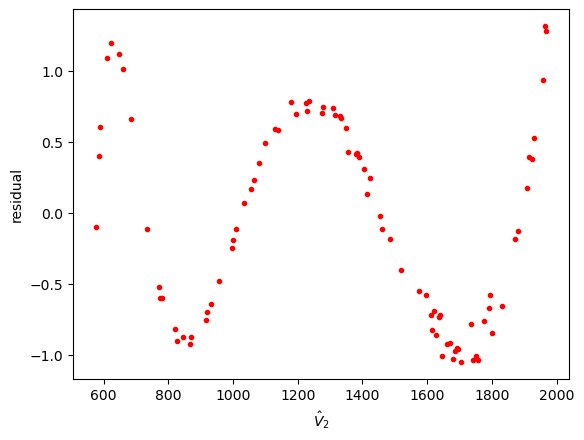

In [129]:
plt.plot(Amat_test@param, Y_norm_test.reshape(-1,1) - Amat_test@param,'r.')
plt.ylabel("residual")
plt.xlabel(r'$\hat{V}_2$')

Text(0.5, 0, '$\\hat{V}_2$')

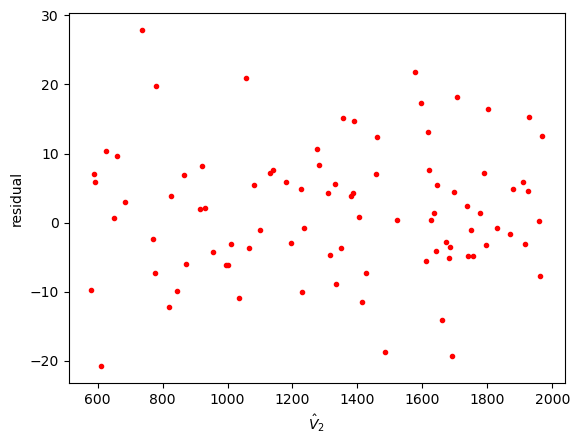

In [130]:
plt.plot(Amat_test@param_noise, Amat_test@param_noise - Y_norm_test_noise.reshape(-1,1),'r.')
plt.ylabel("residual")
plt.xlabel(r'$\hat{V}_2$')

Text(0.5, 0, '$\\hat{V}_2$')

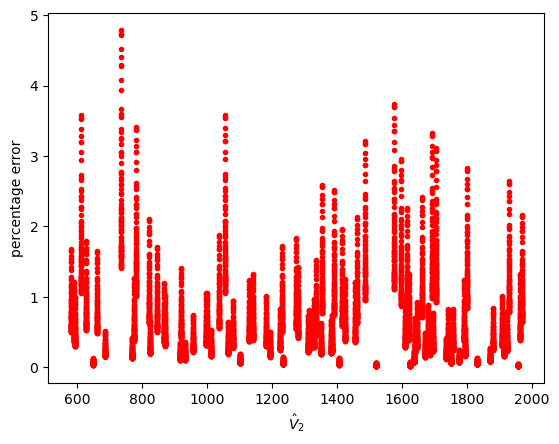

In [131]:
plt.plot(Amat_test@param_noise, abs(Amat_test@param_noise - Y_norm_test_noise.reshape(-1,1))/Y_norm_test_noise*100,'r.')
plt.ylabel("percentage error")
plt.xlabel(r'$\hat{V}_2$')

Text(0.5, 0, '$\\hat{V}_2$')

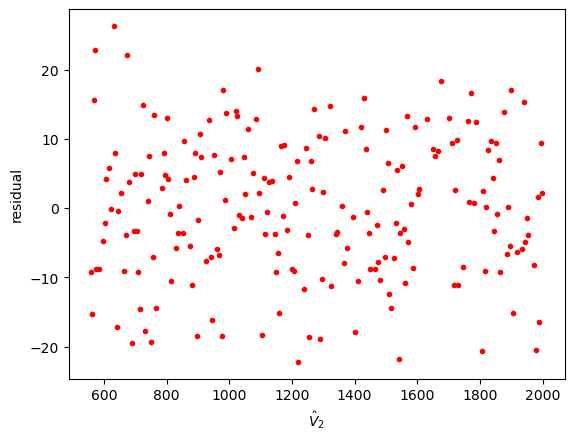

In [132]:
plt.plot(Amat@param_noise, Amat@param_noise - Y_norm_train_noise.reshape(-1,1),'r.')
plt.ylabel("residual")
plt.xlabel(r'$\hat{V}_2$')

Text(0.5, 0, '$\\hat{V}_2$')

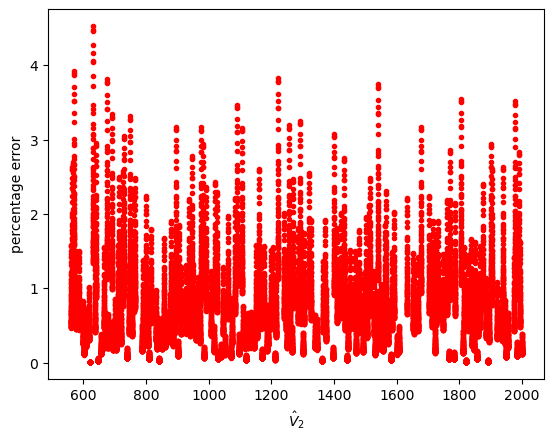

In [138]:
plt.plot(Amat@param_noise, abs(Amat@param_noise - Y_norm_train_noise.reshape(-1,1))/Y_norm_test_noise*100,'r.')
plt.ylabel("percentage error")
plt.xlabel(r'$\hat{V}_2$')

## Sorted data for plots

### Training Data

In [139]:
# Sort the data using the arguments that sorts the X-axis to sort the correspoding Y-axis 
x_train_sorting_arg = np.argsort(X_norm_train)
X_norm_train_sorted1 = X_norm_train[x_train_sorting_arg] 
Y_norm_train_sorted1 = Y_norm_train[x_train_sorting_arg]  
Y_norm_train_noise_sorted1 = Y_norm_train_noise[x_train_sorting_arg] 
pred_train = Amat@param
pred_train_sort = pred_train[x_train_sorting_arg]
noise_train_sorted1 = noise[x_train_sorting_arg] 

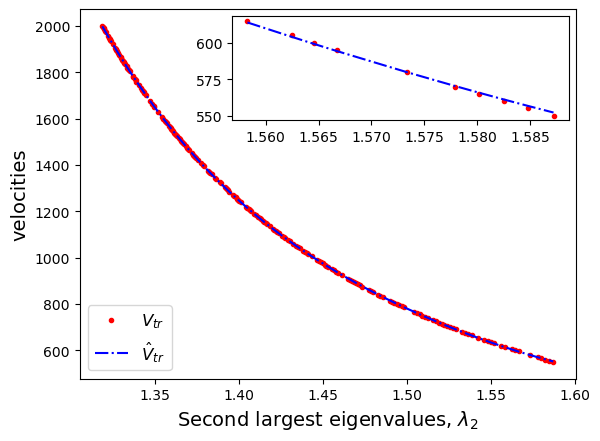

In [140]:
fig,ax = plt.subplots()#figsize=(8,8)
ax.plot(X_norm_train_sorted1,Y_norm_train_sorted1,'r.') 
ax.plot(X_norm_train_sorted1,pred_train_sort, 'b-.')

ax.legend([r"$V_{tr}$",r"$\hat{V}_{tr}$"], loc='lower left', fontsize = 12) 
ax.set_xlabel(r'Second largest eigenvalues, $\lambda_2$', fontsize = 14)
ax.set_ylabel('velocities', fontsize = 14)

axins1 = zoomed_inset_axes(ax, zoom = 6.3, loc='upper right')
axins1.plot(X_norm_train_sorted1[-10:], Y_norm_train_sorted1[-10:],'r.')
axins1.plot(X_norm_train_sorted1[-10:], pred_train_sort[-10:], 'b-.')

plt.savefig(fig_sav+"/norm_v1_500_train_pred.eps")
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_train_pred.eps")

In [141]:
Y_norm_train_sorted1[-10:]

array([615., 605., 600., 595., 580., 570., 565., 560., 555., 550.])

Text(0, 0.5, 'velocities')

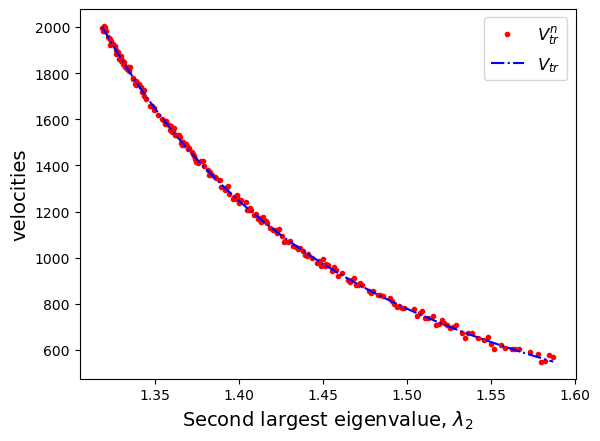

In [142]:
plt.plot(X_norm_train_sorted1,Y_norm_train_noise_sorted1,"r.",X_norm_train_sorted1,Y_norm_train_sorted1,'b-.') 
plt.legend([r'$V_{tr}^n$',r'$V_{tr}$'], fontsize = 12)
plt.xlabel("Second largest eigenvalue, " + r"$\lambda_2$", fontsize = 14)
#plt.ylabel(r"$V_2$") 
plt.ylabel("velocities", fontsize = 14) 
plt.savefig(fig_sav+"/norm_v1_500_train_noise_vels.eps")

Text(0, 0.5, 'noise values')

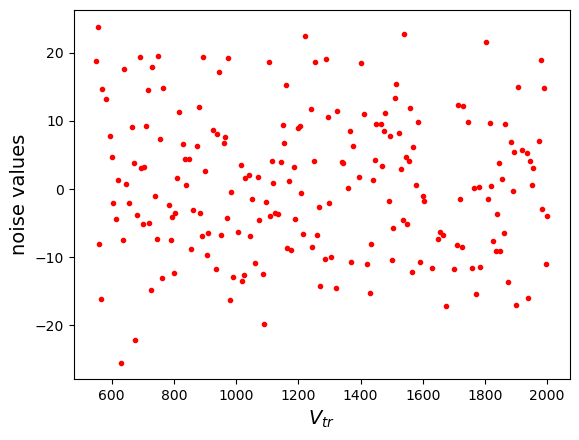

In [143]:
plt.plot(Y_norm_train_sorted1,noise_train_sorted1,"r.") 
plt.xlabel(r"$V_{tr}$", fontsize = 14) 

plt.ylabel("noise values", fontsize = 14) 
plt.savefig(fig_sav+"/v1_500_train_noise.eps")

In [144]:
pred_train_noise = Amat@param_noise
err_train_noise = Y_norm_train_noise.reshape(-1,1) - pred_train_noise  
pred_train_noise_sort, err_train_noise_sort = pred_train_noise[x_train_sorting_arg], err_train_noise[x_train_sorting_arg] 
rel_err_train_noise_sort = abs(err_train_noise_sort)/pred_train_noise_sort

In [258]:
#plt.plot(X_norm_train_sorted1, Y_norm_train_noise_sorted1,'r.',X_norm_train_sorted1, pred_train_noise_sort, 'b-.') 
#plt.legend([r'$V^n_{tr}$', r'$\hat{V}^n_{tr}$'])
#plt.ylabel("velocities")
#plt.xlabel(r'second largest eigenvalues, $\lambda_2$') 
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Figures/norm_v1_500_test_noise_pred_vels.eps") 

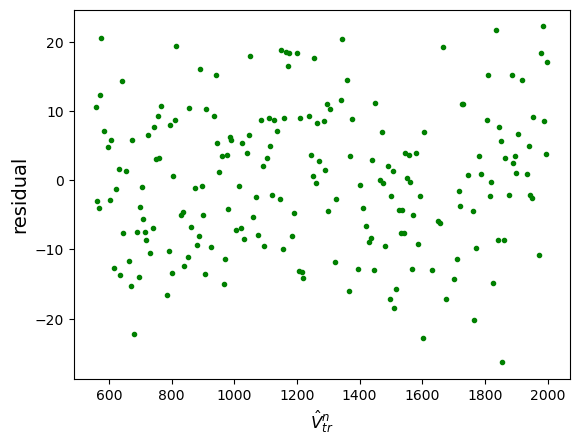

In [148]:
plt.plot(pred_train_noise_sort,  err_train_noise,'g.')
plt.ylabel("residual", fontsize = 14)
plt.xlabel(r'$\hat{V}^{n}_{tr}$', fontsize = 12)
plt.savefig(fig_sav+"/v1_500_train_noise_residual.eps")

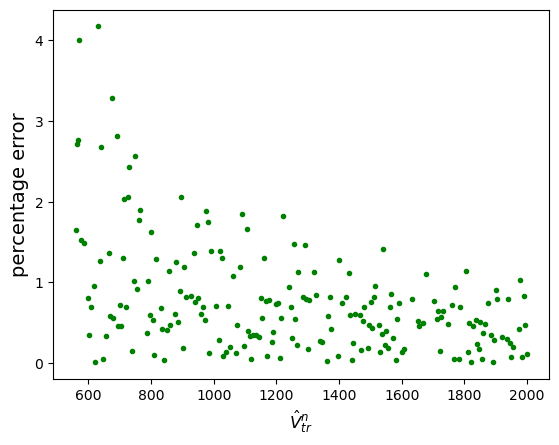

In [149]:
plt.plot(pred_train_noise_sort,  rel_err_train_noise_sort*100,'g.')
plt.ylabel("percentage error", fontsize = 14)
plt.xlabel(r'$\hat{V}^{n}_{tr}$', fontsize = 12)
plt.savefig(fig_sav+"/v1_500_train_noise_percErr.eps")

### Test Data

In [150]:
# Sort the test data using the arguments that sorts the X-axis to sort the correspoding Y-axis 
x_test_sorting_arg = np.argsort(X_norm_test)
X_norm_test_sorted1 = X_norm_test[x_test_sorting_arg] 
Y_norm_test_sorted1 = Y_norm_test[x_test_sorting_arg]  
Y_norm_test_noise_sorted1 = Y_norm_test_noise[x_test_sorting_arg] 
noise_test_sorted1 = noise_test[x_test_sorting_arg] 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


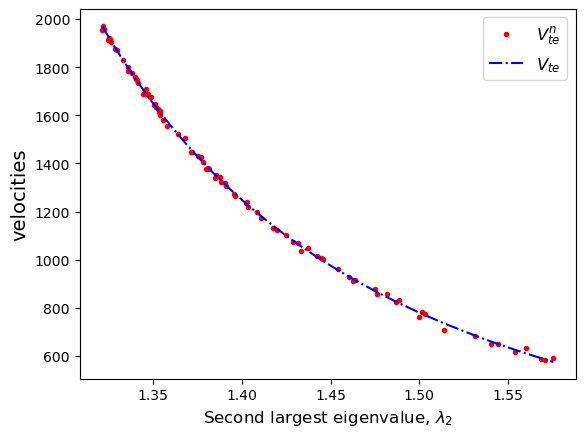

In [151]:
plt.plot(X_norm_test_sorted1,Y_norm_test_noise_sorted1,"r.", X_norm_test_sorted1,Y_norm_test_sorted1,'b-.') 
plt.legend([r'$V^n_{te}$', r'$V_{te}$'], fontsize = 12)
plt.xlabel("Second largest eigenvalue, " + r"$\lambda_2$", fontsize = 12) 
plt.ylabel(r"$V_2$")
plt.ylabel("velocities", fontsize = 14) 
plt.savefig(fig_sav+"/norm_v1_500_test_noise_vels.eps")

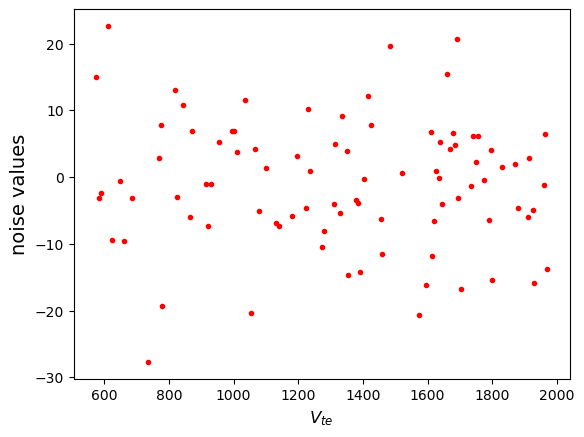

In [152]:
plt.plot(Y_norm_test_sorted1,noise_test_sorted1,"r.") 
plt.xlabel(r"$V_{te}$", fontsize = 12) 
#plt.ylabel(r"$V_2$") 
plt.ylabel("noise values", fontsize = 14) 
plt.savefig(fig_sav + "/v1_500_test_noise.eps")

### Accuracy related to noisy test data

In [153]:
pred_test_noise = Amat_test@param_noise
pred_test = Amat_test@param 
err_test_noise = Y_norm_test_noise.reshape(-1,1) - pred_test_noise  
pred_test_sort = pred_test[x_test_sorting_arg]
pred_test_noise_sort, err_test_noise_sort = pred_test_noise[x_test_sorting_arg], err_test_noise[x_test_sorting_arg]
rel_err_test_noise_sort = abs(err_test_noise_sort)/pred_test_noise_sort

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


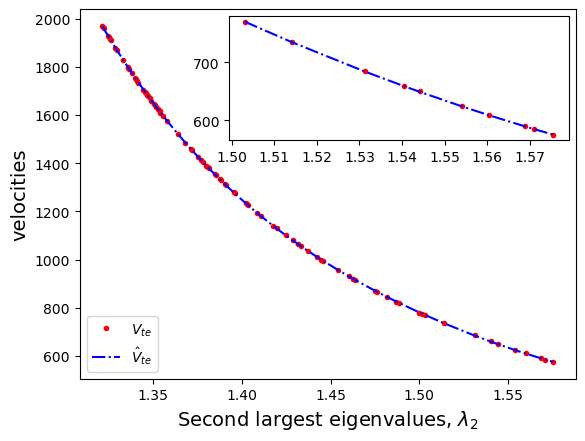

In [154]:
fig,ax = plt.subplots()#figsize=(8,8)
ax.plot(X_norm_test_sorted1,Y_norm_test_sorted1,'r.') 
ax.plot(X_norm_test_sorted1,pred_test_sort, 'b-.')

ax.legend([r"$V_{te}$",r"$\hat{V}_{te}$"], loc='lower left') 
ax.set_xlabel(r'Second largest eigenvalues, $\lambda_2$', fontsize = 14)
ax.set_ylabel('velocities', fontsize = 14)

axins1 = zoomed_inset_axes(ax, zoom = 2.4, loc='upper right')
axins1.plot(X_norm_test_sorted1[-10:], Y_norm_test_sorted1[-10:],'r.')
axins1.plot(X_norm_test_sorted1[-10:], pred_test_sort[-10:], 'b-.')

plt.savefig(fig_sav + "/norm_v1_500_test_pred.eps")

In [155]:
Y_norm_test_sorted1[-10:], X_norm_test_sorted1[-10:]

(array([770., 735., 685., 660., 650., 625., 610., 590., 585., 575.]),
 array([1.50305069, 1.51412061, 1.53126265, 1.54048127, 1.54429771,
        1.55418408, 1.56037487, 1.56892882, 1.5711217 , 1.57558666]))

Text(0.5, 0, 'second largest eigenvalues, $\\lambda_2$')

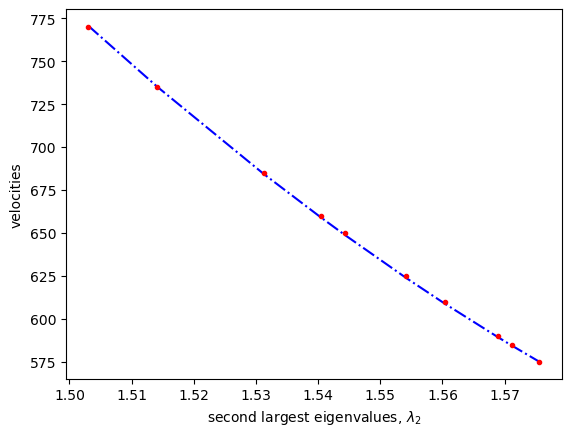

In [156]:
plt.plot(X_norm_test_sorted1[-10:], pred_test_sort[-10:], 'b-.', X_norm_test_sorted1[-10:], Y_norm_test_sorted1[-10:],'r.') 

plt.ylabel("velocities")
plt.xlabel(r'second largest eigenvalues, $\lambda_2$')

Text(0.5, 0, 'second largest eigenvalues, $\\lambda_2$')

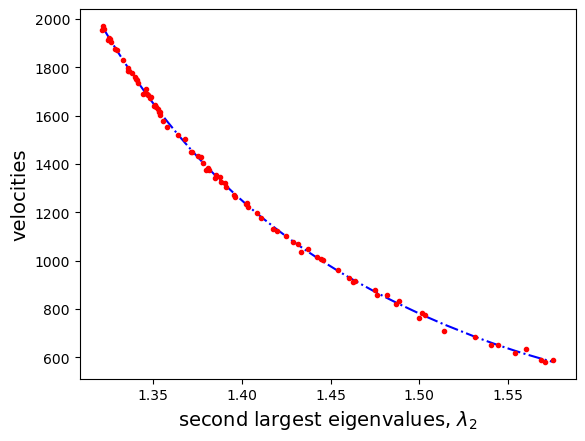

In [157]:
plt.plot(X_norm_test_sorted1, pred_test_noise_sort, 'b-.', X_norm_test_sorted1, Y_norm_test_noise_sorted1,'r.') 

#plt.plot(X_norm_test_sorted1,Y_norm_test_sorted1,'b-.',X_norm_test_sorted1,Y_norm_test_noise_sorted1,"r-.") 
plt.ylabel("velocities", fontsize = 14)
plt.xlabel(r'second largest eigenvalues, $\lambda_2$', fontsize = 14)

In [158]:
412.7552*500

206377.6

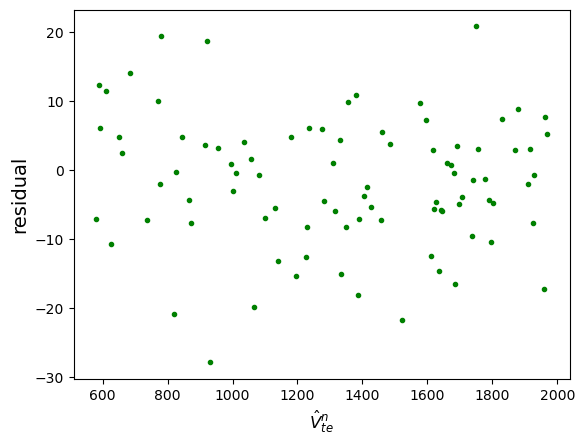

In [159]:
plt.plot(pred_test_noise_sort,  err_test_noise,'g.')
plt.ylabel("residual", fontsize = 14)
plt.xlabel(r'$\hat{V}^{n}_{te}$', fontsize = 12)
plt.savefig(fig_sav+"/v1_500_test_noise_residual.eps")

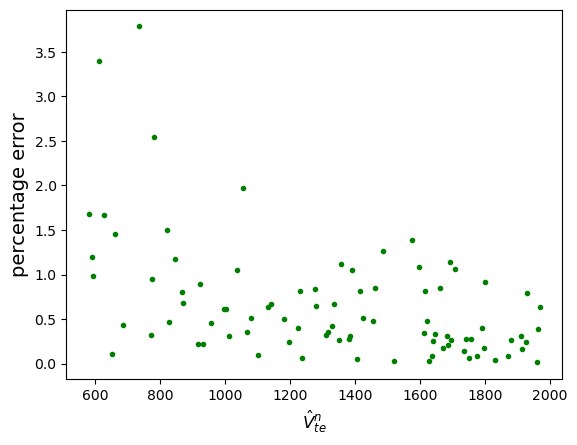

In [160]:
plt.plot(pred_test_noise_sort,  rel_err_test_noise_sort*100,'g.')
plt.ylabel("percentage error", fontsize = 14)
plt.xlabel(r'$\hat{V}^{n}_{te}$', fontsize = 12)
plt.savefig(fig_sav + "/v1_500_test_noise_percErr.eps")

In [279]:
max(abs(Y_norm_train - Y_norm_train_noise)/Y_norm_train*100)

4.293954549304405

In [ ]:
4.293954549304405

In [278]:
#abs(Y_norm_train - Y_norm_train_noise)/Y_norm_train*100

In [462]:
abs(params - param_noise)/abs(params)*100

array([[5.39901517],
       [6.02908719],
       [6.67871517],
       [7.35220503],
       [8.05243418]])

## Write Data to file

In [499]:
train_data_nonoise = np.column_stack((X_norm_train,Y_norm_train))
train_data_withnoise = np.column_stack((X_norm_train,Y_norm_train_noise))

test_data_nonoise = np.column_stack((X_norm_test,Y_norm_test))
test_data_withnoise = np.column_stack((X_norm_test,Y_norm_test_noise)) 

In [505]:
np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Train_Data_NoNoise.csv",train_data_nonoise,delimiter=',')
#np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Train_Data_WithNoise.csv",train_data_withnoise,delimiter=',')

np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Test_Data_NoNoise.csv",test_data_nonoise,delimiter=',')
#np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Test_Data_WithNoise.csv",test_data_withnoise,delimiter=',')

In [514]:
Manuscript_Data = np.concatenate((sorted_norm_wg_LE[s_ind:,1:].reshape(-1, 1),v2[s_ind:]), axis = 1)

In [518]:
np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Full_NormalizedLapalcian_V2_DataSet.csv",Manuscript_Data,delimiter=',')

In [533]:
Combined_Manuscript_Data = np.concatenate((sorted_norm_wg_LE[s_ind:,1:].reshape(-1, 1),sorted_model_LE[s_ind:].reshape(-1, 1),v2[s_ind:]), axis = 1)

In [535]:
np.savetxt("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Data/Combined_Normalized_and_Weighted_Graph_Data.csv",Combined_Manuscript_Data,delimiter=',')

## Tikhonov Regularization: 

We will now pply Tikhonov regularization to try and stabilize the system (find a more regular solution to the problem) 
So rather solving the Least square problem: 

$$
\min\limits_{m} ||Gm - d||_2^2 ,
$$ 
we solve the tempered least squares problem 
$$
\min_{m} ||Gm - d||_2^2 + \alpha^2 ||m||_2^2,
$$ 
To this end, we will examine two ways of finding "an appropriate" $\alpha$:

1. L-Curve
2. Discrepancy rule

In both cases, one should start with a set of $\alpha > 0$ values and the solve the least square problem for each alpha. Then examine the norm $||Gm - d||_2$ and $||m||_2^2$ (for the case of the L-Curve) or the norm $||Gm - d||_2^2$ only for the discrepancy rule

Formulate the damped least squares problem

In [ ]:
alf = 0.5 # Take a sample alpha 

sp.linalg.solve(Amat.T@Amat + alf**2*np.eye(min(Amat.shape)), Amat.T@Y_norm_train.reshape(-1,1))

### L-Curve

In [464]:
err_norms, sol_norms, sols = [], [], [] 
alfs = np.linspace(0,10,201)[1:]
for alph in alfs: 
    lhs = Amat.T@Amat + (alph**2)*np.eye(min(Amat.shape)) 
    rhs = Amat.T@Y_norm_train.reshape(-1,1)
    sol = sp.linalg.solve(lhs, rhs)
    err_norms.append(np.linalg.norm(Amat@sol - Y_norm_train.reshape(-1,1)))
    sol_norms.append(np.linalg.norm(sol))
    sols.append(sol)

In [466]:
len(sols)

200

Text(0, 0.5, '$||\\hat{b}||$')

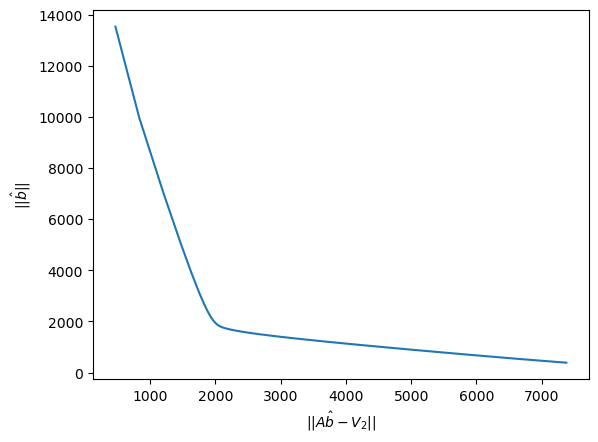

In [468]:
plt.plot(err_norms,sol_norms)
plt.xlabel(r"$||A\hat{b} - V_2||$")
plt.ylabel(r"$||\hat{b}||$") 
#plt.savefig("../../../Manuscript/Graph-Seismic_Velocity_exact_Redraft/Enhancing_Seismic_Velocity_Normalized/Figures/SecondLargest_V2_Relation_for_V1_500.eps")

### Find alpha that corresponds to the corner

In [471]:
#np.column_stack((err_norms,sol_norms))

After obtaining $\alpha$, now estimate the parameter again from the system

In [474]:
alf = 0.65#alfs[0]# Take a sample alpha 
lhs = Amat.T@Amat + (alf**2)*np.eye(min(Amat.shape)) 
rhs = Amat.T@Y_norm_train.reshape(-1,1) 
rhs_noise = Amat.T@Y_norm_train_noise.reshape(-1,1)


Tk_est = sp.linalg.solve(lhs, rhs)
Tk_est_noise = sp.linalg.solve(lhs, rhs_noise)

In [476]:
Tk_est, Tk_est_noise

(array([[1367.19887586],
        [1057.30453259],
        [ 565.76410652],
        [ -60.06105363],
        [-629.8687102 ]]),
 array([[1367.83605492],
        [1056.96795035],
        [ 564.52248262],
        [ -61.29422235],
        [-628.25982064]]))

In [480]:
abs(Tk_est-Tk_est_noise)/abs(Tk_est)*100

array([[0.04660471],
       [0.03183399],
       [0.21945965],
       [2.05319196],
       [0.25543253]])

In [411]:
np.abs(Tk_est - Tk_est_noise)/Tk_est*100

array([[ 0.04660471],
       [ 0.03183399],
       [ 0.21945965],
       [-2.05319196],
       [-0.25543253]])

### Regularization Accuracy Check

In [416]:
Y_norm_train.shape

(203,)

In [418]:
rhs = Y_norm_train_noise.reshape(-1,1)
Tk_train_pred_noise = Amat@Tk_est_noise.reshape(-1,1) 


#np.column_stack((rhs,Tk_train_pred))

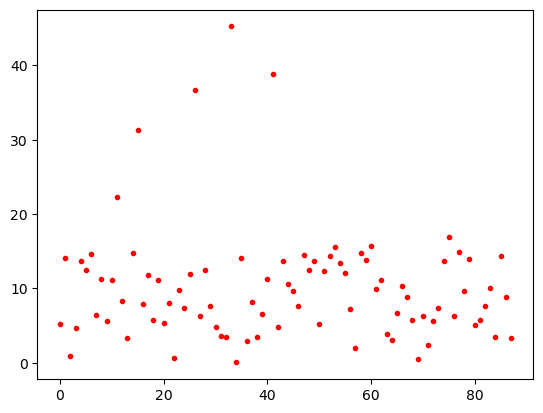

In [420]:
Tk_test_pred_noise = Amat_test@Tk_est_noise.reshape(-1,1)  
Tk_err_test_pred_noise = Tk_test_pred_noise - rhs_test_noise 
plt.plot(np.abs(Tk_err_test_pred_noise.flatten())/rhs_test_noise.flatten()*100, 'r.')

In [422]:
param_noise

array([[  940886.76736785],
       [-2425751.62915838],
       [ 2360980.59137456],
       [-1026349.03602287],
       [  167949.21366294]])

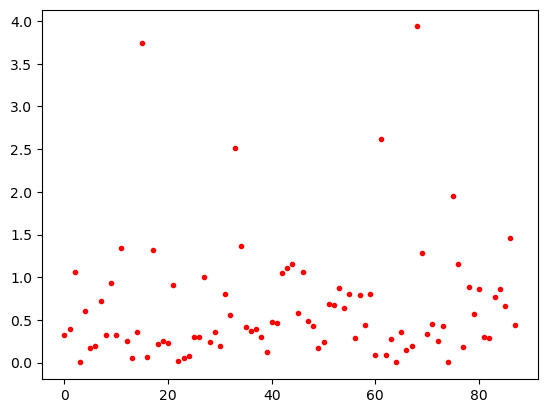

In [424]:
Tk_test_pred_noise = Amat_test@param
Tk_err_test_pred_noise = Tk_test_pred_noise - rhs_test_noise 
plt.plot(np.abs(Tk_err_test_pred_noise.flatten())/rhs_test_noise.flatten()*100, 'r.')

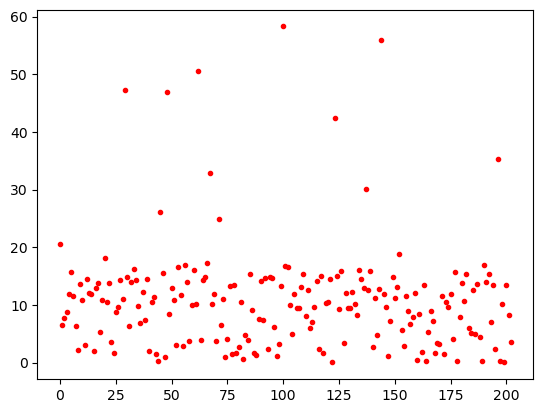

In [427]:
Tk_err_train_pred = Tk_train_pred - rhs 
plt.plot(np.abs(Tk_err_train_pred.flatten())/rhs.flatten()*100, 'r.')

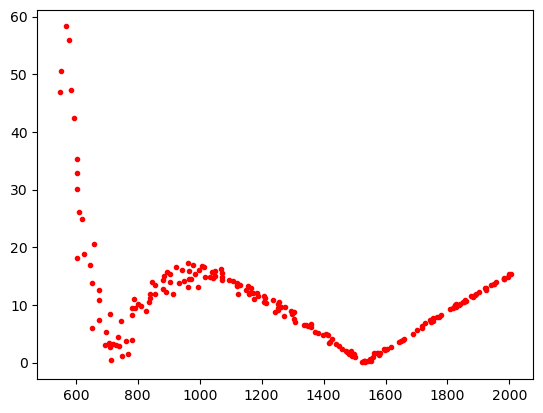

In [429]:
Tk_err_train_pred = Tk_train_pred - rhs 
plt.plot(rhs.flatten()[x_sorting_arg], np.abs(Tk_err_train_pred.flatten())[x_sorting_arg]/rhs.flatten()[x_sorting_arg]*100, 'r.')

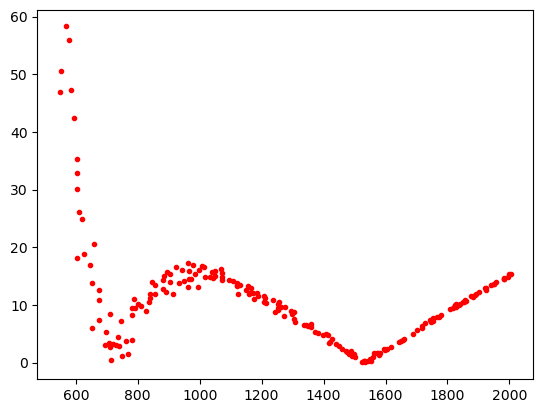

In [326]:
Tk_err_train_pred = Tk_train_pred - rhs 
plt.plot(rhs.flatten(), np.abs(Tk_err_train_pred.flatten())/rhs.flatten()*100, 'r.')

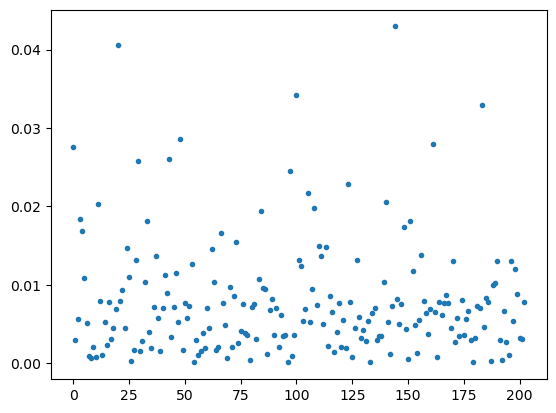

In [206]:
plt.plot(np.abs(Y_norm_train_noise - Y_norm_train)/Y_norm_train, '.')

# Related to Weighted (unnormalized) and its comparison with normalized

#### Split weighted graph data with $v_2 = 500$, into train and test set 

- 70% for training 

- 30% for testing

In [77]:
s_ind = 50
Data = np.concatenate(((sorted_model_LE[s_ind:]).reshape(-1, 1),v2[s_ind:]), axis = 1)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(Data[:,0], Data[:,1], train_size=0.7, test_size=0.3, random_state=0)

Text(0, 0.5, '$v_2$')

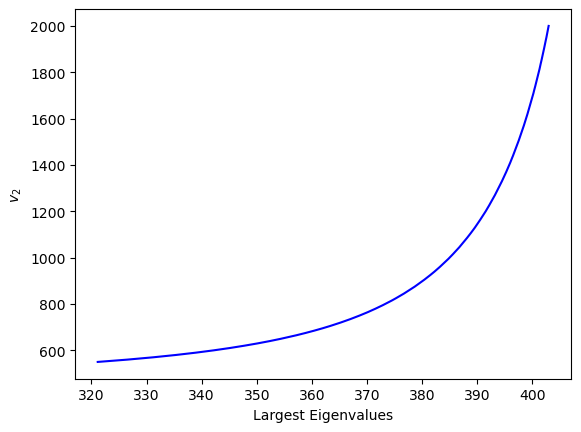

In [79]:
plt.plot(Data[:,0], Data[:,1], "b-") 
plt.xlabel("Largest Eigenvalues")
plt.ylabel(r"$v_2$")
#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity/Figures/weight_v1_500_relation.eps")

### train_test_split regression for weighted

In [80]:
poly_model_train = PolynomialFeatures(degree=4,include_bias=False)
poly_model_features_train = poly_model_train.fit_transform(X_train.reshape(-1, 1)) 

lr_model_poly_train = LinearRegression()
lr_model_poly_train.fit(poly_model_features_train, Y_train.reshape(-1,1))

LinearRegression()

In [81]:
poly_model_features_test = poly_model_train.fit_transform(X_test.reshape(-1, 1))

In [82]:
lr_model_poly_pred_test = lr_model_poly_train.predict(poly_model_features_test)
lr_model_poly_pred_train = lr_model_poly_train.predict(poly_model_features_train)

### Compute Metrices: 
***Prediction of the weighted adjacency matrix***
1. Root mean square error
2. Mean absolute percentage error
3. $r2$ score

In [84]:
print("Root mean square error of the test data is: ", root_mean_squared_error(Y_test, lr_model_poly_pred_test)) 
print("Mean absolute error of the test data is: ", mean_absolute_error(Y_test, lr_model_poly_pred_test))  
print("Mean absolute percentage error of the test data is: ", mean_absolute_percentage_error(Y_test, lr_model_poly_pred_test))   
print("Model R2 score for the test data is: ", r2_score(Y_test, lr_model_poly_pred_test)) 

Root mean square error of the test data is:  17.150384952102442
Mean absolute error of the test data is:  14.819866804003885
Mean absolute percentage error of the test data is:  0.013117524189099422
Model R2 score for the test data is:  0.9982356117900533


In [85]:
print("Root mean square error of the train data is: ", root_mean_squared_error(Y_train, lr_model_poly_pred_train)) 
print("Mean absolute error of the train data is: ", mean_absolute_error(Y_train, lr_model_poly_pred_train))  
print("Mean absolute percentage error of the train data is: ", mean_absolute_percentage_error(Y_train, lr_model_poly_pred_train))   
print("Model R2 score for the train data is: ", r2_score(Y_train, lr_model_poly_pred_train))

Root mean square error of the test data is:  17.83696764517247
Mean absolute error of the test data is:  15.275449798708516
Mean absolute percentage error of the test data is:  0.01435641974835976
Model R2 score for the test data is:  0.9982190392475359


### Sorted Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


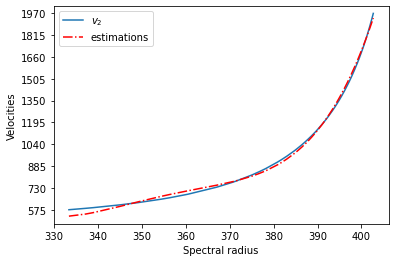

In [70]:
model_test_sarg = np.argsort(Y_test)
Y_test_sort = Y_test[model_test_sarg]
pred_test_sort = lr_model_poly_pred_test.flatten()[model_test_sarg]
eig_test_sort = X_test[model_test_sarg]
plt.plot(eig_test_sort,Y_test_sort, label = r"$v_2$") 
plt.plot(eig_test_sort,pred_test_sort, "r-.", label = "estimations")

plt.yticks(np.linspace(Y_test_sort.min(), Y_test_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_test_sort[0]-100), np.max(Y_test_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Spectral radius")
plt.legend() 
#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_v1_500_test_pred.eps")

#ind_test = np.linspace(0, len(Y_test_sort)-1, 8, dtype=int)
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
#Y_test_sort[ind_test]
#plt.ylim(np.min(Y_test_sort[0],eig_test_sort[0]), np.max(Y_test_sort[-1],eig_test_sort[-1]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


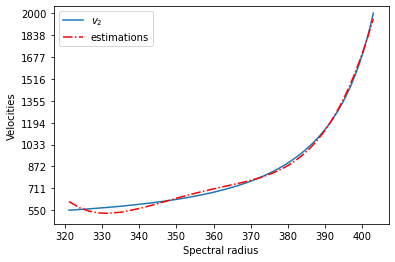

In [71]:
model_train_sarg = np.argsort(Y_train)
Y_train_sort = Y_train[model_train_sarg]
pred_train_sort = lr_model_poly_pred_train.flatten()[model_train_sarg]
eig_train_sort = X_train[model_train_sarg]
plt.plot(eig_train_sort,Y_train_sort, label = r"$v_2$") 
plt.plot(eig_train_sort,pred_train_sort, "r-.", label = "estimations")

plt.yticks(np.linspace(Y_train_sort.min(), Y_train_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_train_sort[0]-100), np.max(Y_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Spectral radius")
plt.legend() 

#plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_v1_500_train_pred.eps")

#ind_test = np.linspace(0, len(Y_test_sort)-1, 8, dtype=int)
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
#Y_test_sort[ind_test]
#plt.ylim(np.min(Y_test_sort[0],eig_test_sort[0]), np.max(Y_test_sort[-1],eig_test_sort[-1]))

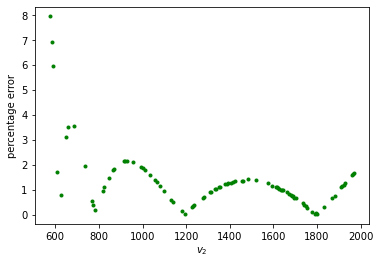

In [72]:
plt.plot(Y_test, np.abs((Y_test - lr_model_poly_pred_test.flatten())/Y_test)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error") 
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_v1_500_test_error.eps")

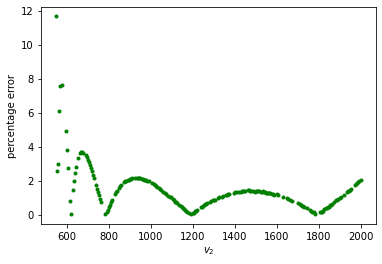

In [105]:
plt.plot(Y_train, np.abs((Y_train - lr_model_poly_pred_train.flatten())/Y_train)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_v1_500_train_error.eps")

Text(0, 0.5, 'percentage error')

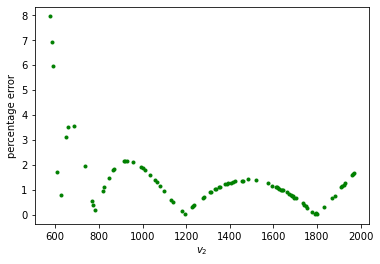

In [166]:
plt.plot(Y_test_sort, np.abs((Y_test_sort - pred_test_sort)/Y_test_sort)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")

Text(0, 0.5, 'percentage error')

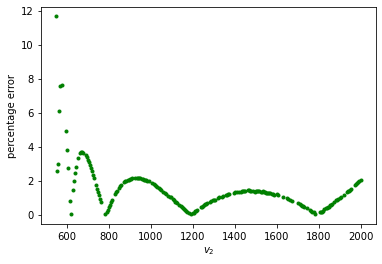

In [167]:
plt.plot(Y_train_sort, np.abs((Y_train_sort - pred_train_sort)/Y_train_sort)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")

### Plot velocity vs model number

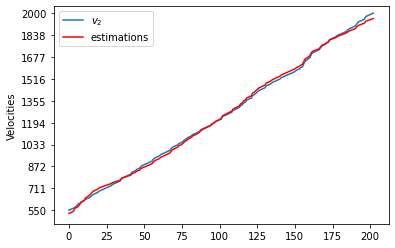

In [132]:
Y_train_sort = np.sort(Y_train)
eig_train_sort = np.sort(lr_model_poly_pred_train.flatten())
plt.plot(Y_train_sort, label = r"$v_2$") 
plt.plot(eig_train_sort, "r-", label = "estimations")

plt.yticks(np.linspace(Y_train_sort.min(), Y_train_sort.max(), 10, dtype = int))
plt.ylim(np.min(Y_train_sort[0]-100), np.max(Y_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.legend()

Text(0, 0.5, 'percentage residual')

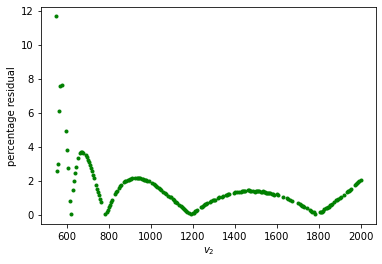

In [142]:
plt.plot(Y_train, np.abs((Y_train - lr_model_poly_pred_train.flatten())/Y_train)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

Text(0, 0.5, 'percentage residual')

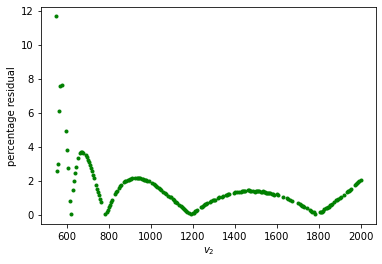

In [133]:
plt.plot(Y_train, np.abs((Y_train - lr_model_poly_pred_train.flatten())/Y_train)*100, "g.") 
#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage residual")

In [159]:
len(X_train), len(X_test)

(203, 88)

array([1680., 1965., 1595., 1405., 1140., 1915.,  915., 1335., 1195.,
        775., 1225.,  625., 1310., 1635., 1010.,  610., 1775.,  660.,
       1380., 1880., 1685., 1800., 1520., 1830., 1750., 1910.,  590.,
       1390., 1925., 1330., 1670., 1460., 1425.,  575., 1575., 1065.,
       1610., 1790., 1645., 1735.,  825.,  585., 1705., 1035.,  845.,
       1280., 1355.,  955., 1180., 1100., 1695.,  870.,  995.,  920.,
       1970., 1930., 1740., 1615., 1080.,  865.,  650.,  780., 1870.,
       1640., 1625.,  685., 1235., 1795.,  735., 1485., 1350., 1620.,
       1385., 1315., 1960., 1055., 1690.,  930., 1230., 1130., 1660.,
        770., 1755., 1275., 1415., 1000.,  820., 1455.])

In [173]:
col_norm_data.shape

(291, 1)

### normalized vs weighted comparison

In [76]:
col_norm_data = (sorted_norm_wg_LE[s_ind:,1:]).reshape(-1, 1)
col_weig_data = (sorted_model_LE[s_ind:]).reshape(-1, 1)

Data_comb = np.concatenate((col_norm_data,col_weig_data,v2[s_ind:]), axis = 1)

In [77]:
X_comb_train, X_comb_test, Y_comb_train, Y_comb_test = train_test_split(Data_comb[:,0:2], Data_comb[:,2:], train_size=0.7, test_size=0.3, random_state=0)

In [78]:
norm_comb_train, weig_comb_train = X_comb_train.T
norm_comb_test, weig_comb_test = X_comb_test.T

In [88]:
poly_weig_model_comb = PolynomialFeatures(degree=4,include_bias=False)
poly_weig_model_comb_features_train = poly_weig_model_comb.fit_transform(weig_comb_train.reshape(-1, 1)) 

lr_weig_model_comb_poly = LinearRegression()
lr_weig_model_comb_poly.fit(poly_weig_model_comb_features_train, Y_comb_train.reshape(-1,1)) 

poly_weig_model_comb_features_test = poly_weig_model_comb.fit_transform(weig_comb_test.reshape(-1, 1)) 

lr_weig_model_comb_poly_pred_test = lr_weig_model_comb_poly.predict(poly_weig_model_comb_features_test)
lr_weig_model_comb_poly_pred_train = lr_weig_model_comb_poly.predict(poly_weig_model_comb_features_train)

In [90]:
poly_norm_model_comb = PolynomialFeatures(degree=4,include_bias=False)
poly_norm_model_comb_features_train = poly_norm_model_comb.fit_transform(norm_comb_train.reshape(-1, 1)) 

lr_norm_model_comb_poly = LinearRegression()
lr_norm_model_comb_poly.fit(poly_norm_model_comb_features_train, Y_comb_train.reshape(-1,1)) 

poly_norm_model_comb_features_test = poly_norm_model_comb.fit_transform(norm_comb_test.reshape(-1, 1)) 

lr_norm_model_comb_poly_pred_test = lr_norm_model_comb_poly.predict(poly_norm_model_comb_features_test)
lr_norm_model_comb_poly_pred_train = lr_norm_model_comb_poly.predict(poly_norm_model_comb_features_train)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


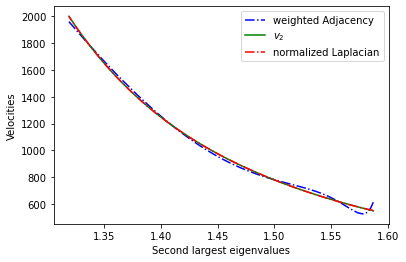

In [100]:
train_comb_sarg = np.argsort(Y_comb_train.flatten())
norm_comb_eig_train_sort = norm_comb_train[train_comb_sarg]

Y_norm_comb_train_sort = Y_comb_train.flatten()[train_comb_sarg]
norm_comb_pred_train_sort = lr_norm_model_comb_poly_pred_train.flatten()[train_sarg]
weig_comb_pred_train_sort = lr_weig_model_comb_poly_pred_train.flatten()[train_sarg]


plt.plot(norm_comb_eig_train_sort, weig_comb_pred_train_sort, "b-.", label = "weighted Adjacency")
plt.plot(norm_comb_eig_train_sort, Y_norm_comb_train_sort, "g-", label = r"$v_2$") 
plt.plot(norm_comb_eig_train_sort, norm_comb_pred_train_sort, "r-.", label = "normalized Laplacian")


#plt.yticks(np.linspace(Y_norm_train_sort.min(), Y_norm_train_sort.max(), 10, dtype = int))
#plt.ylim(np.min(Y_norm_train_sort[0]-100), np.max(Y_norm_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Second largest eigenvalues")
plt.legend()
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/norm_comb_v1_500_train_pred.eps")

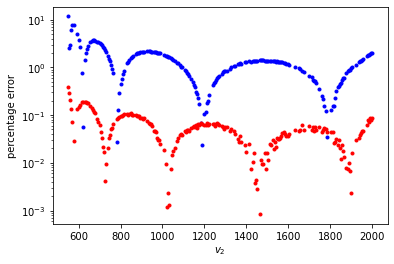

In [104]:
plt.plot(Y_norm_comb_train_sort, np.abs((Y_norm_comb_train_sort - weig_comb_pred_train_sort)/Y_norm_comb_train_sort)*100, "b.") 
plt.plot(Y_norm_comb_train_sort, np.abs((Y_norm_comb_train_sort - norm_comb_pred_train_sort)/Y_norm_comb_train_sort)*100, "r.") 

#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")
plt.yscale("log")
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_comb_v1_500_train_error.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


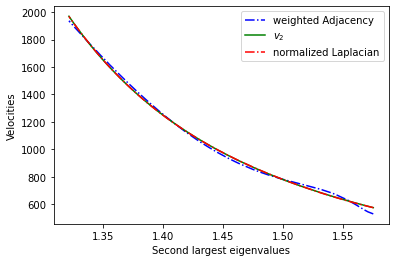

In [110]:
test_comb_sarg = np.argsort(Y_comb_test.flatten())
norm_comb_eig_test_sort = norm_comb_test[test_comb_sarg]

Y_norm_comb_test_sort = Y_comb_test.flatten()[test_comb_sarg]
norm_comb_pred_test_sort = lr_norm_model_comb_poly_pred_test.flatten()[test_sarg]
weig_comb_pred_test_sort = lr_weig_model_comb_poly_pred_test.flatten()[test_sarg]


plt.plot(norm_comb_eig_test_sort, weig_comb_pred_test_sort, "b-.", label = "weighted Adjacency")
plt.plot(norm_comb_eig_test_sort, Y_norm_comb_test_sort, "g-", label = r"$v_2$") 
plt.plot(norm_comb_eig_test_sort, norm_comb_pred_test_sort, "r-.", label = "normalized Laplacian")


#plt.yticks(np.linspace(Y_norm_train_sort.min(), Y_norm_train_sort.max(), 10, dtype = int))
#plt.ylim(np.min(Y_norm_train_sort[0]-100), np.max(Y_norm_train_sort[-1]+50))
plt.ylabel("Velocities")
plt.xlabel("Second largest eigenvalues")
plt.legend()
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/norm_comb_v1_500_test_pred.eps")

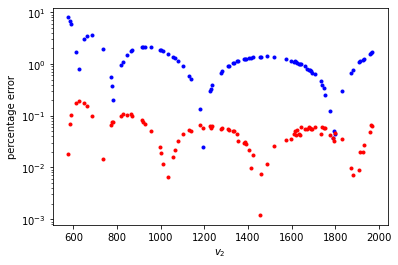

In [111]:
plt.plot(Y_norm_comb_test_sort, np.abs((Y_norm_comb_test_sort - weig_comb_pred_test_sort)/Y_norm_comb_test_sort)*100, "b.") 
plt.plot(Y_norm_comb_test_sort, np.abs((Y_norm_comb_test_sort - norm_comb_pred_test_sort)/Y_norm_comb_test_sort)*100, "r.") 

#plt.xlim(s_ind-1, len(sorted_model_LE)+1)
#plt.xticks(model_ticks)
plt.xlabel(r"$v_2$")
plt.ylabel("percentage error")
plt.yscale("log")
plt.savefig("../../../Manuscripts/Graph-Seismic_Velocity_exact/Figures/weig_comb_v1_500_test_error.eps")

In [109]:
np.log(64)/np.log(3)

3.785578521428744

In [448]:
s_ind_lwg = 50
perc_lwg = 10
s_vec_lwg = v2[s_ind_lwg,0]
sorted_LWG_LE = sorted_LWG_LE[:,0:1]
model_number = np.linspace(s_ind_lwg+1, len(sorted_LWG_LE), len(sorted_LWG_LE)-s_ind_lwg, dtype=int)
#model_ticks = np.linspace(s_ind+1, len(sorted_model_LE), 10, dtype=int)

#model_number = np.linspace(11, len(sorted_model_LE), len(sorted_model_LE)-s_ind, dtype=int)
lwg_ticks = np.linspace(11, len(sorted_LWG_LE), 10, dtype=int)

In [449]:
quartic_LWG = PolynomialFeatures(degree=4,include_bias=False)
quartic_LWG_features = quartic_LWG.fit_transform((sorted_LWG_LE[s_ind_lwg:]/1000).reshape(-1, 1))

In [450]:
lr_LWG_quartic = LinearRegression()
lr_LWG_quartic.fit(quartic_LWG_features, v2[s_ind_lwg:])

LinearRegression()

In [451]:
lr_LWG_quartic_pred = lr_LWG_quartic.predict(quartic_LWG_features)

Text(0.5, 1.0, 'quartic Regression')

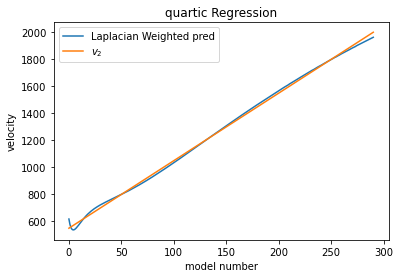

In [452]:
plt.plot(lr_LWG_quartic_pred, label = "Laplacian Weighted pred")
plt.plot(v2[s_ind_lwg:], label = r"$v_2$")
plt.xlabel("model number")
plt.ylabel("velocity")
plt.legend()
plt.title("quartic Regression")

Text(0.5, 1.0, '$v_2$ $\\geq$ $v_1$ + 10%$v_1$ = 550.0')

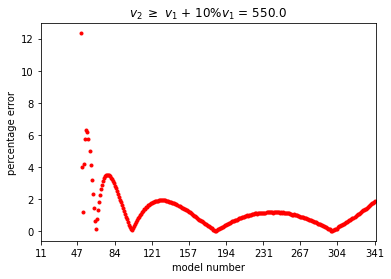

In [453]:
plt.plot(model_number, np.abs((v2[s_ind_lwg:] - lr_LWG_quartic_pred)/v2[s_ind_lwg:])*100, "r.") 
plt.xlim(s_ind_lwg-1, len(sorted_LWG_LE)+1)
plt.xticks(lwg_ticks)
plt.xlabel("model number")
plt.ylabel("percentage error")
#plt.title("Perc err: quartic Regression")
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ - " + str(perc_lwg) + "%" + r"$v_1$ = " + str(s_vec_lwg))
plt.title(r"$v_2$ " + r"$\geq$ " + r"$v_1$ + " + str(perc_lwg) + "%" + r"$v_1$ = " + str(s_vec_lwg))

In [521]:
quartic_model_features_test = quartic_model.fit_transform((sorted_model_LE_test[50:]/1000).reshape(-1, 1))
lr_model_quartic_test_pred = lr_model_quartic.predict(quartic_model_features_test)

Text(0.5, 1.0, 'Perc err: quartic Regression')

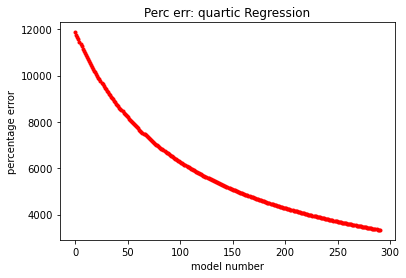

In [522]:
plt.plot(np.abs((v2_test[50:] - lr_model_quartic_test_pred)/v2_test[50:])*100, "r.")
plt.xlabel("model number")
plt.ylabel("percentage error")
plt.title("Perc err: quartic Regression")